# Notebook criado em 22/08/20 para desenvolvimento de uma metodologia para análise da correlação entre focos do satélite de referência (AQUA_M-T) como os S-NPP

In [1]:
# Importação de bibliotecas de referência
import pandas as pd
# from sqlalchemy import create_engine, pool
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<pre>
api=# select name_1, id_1 from dados_geo.estados where id_0 = 33;
       name_1        | id_1
---------------------+------
 MATO GROSSO         |   51
 GOIÁS               |   52
 DISTRITO FEDERAL    |   53
 RONDÔNIA            |   11
 ACRE                |   12
 AMAZONAS            |   13
 RORAIMA             |   14
 PARÁ                |   15
 AMAPÁ               |   16
 TOCANTINS           |   17
 MARANHÃO            |   21
 PIAUÍ               |   22
 CEARÁ               |   23
 PARAÍBA             |   25
 RIO GRANDE DO NORTE |   24
 PERNAMBUCO          |   26
 ALAGOAS             |   27
 SERGIPE             |   28
 BAHIA               |   29
 MINAS GERAIS        |   31
 ESPÍRITO SANTO      |   32
 RIO DE JANEIRO      |   33
 SÃO PAULO           |   35
 PARANÁ              |   41
 SANTA CATARINA      |   42
 RIO GRANDE DO SUL   |   43
 MATO GROSSO DO SUL  |   50
 
 
 api=# select distinct bioma from collection2.focos_bdq_c2 where id_0 =33 and data_hora_gmt > '20200801';
     bioma
----------------
 Amazônia
 Caatinga
 Cerrado
 Mata Atlântica
 Pampa
 Pantanal
 
 </pre>

In [3]:
focos = pd.read_csv('./dados_geral.csv', index_col=0, parse_dates=[1])

In [4]:
focos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9629 entries, 0 to 9628
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_mes  9629 non-null   datetime64[ns]
 1   satelite  9629 non-null   object        
 2   id_1      9629 non-null   int64         
 3   estado    9629 non-null   object        
 4   bioma     9613 non-null   object        
 5   qtd       9629 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 526.6+ KB


In [5]:
focos.isnull().sum()

data_mes     0
satelite     0
id_1         0
estado       0
bioma       16
qtd          0
dtype: int64

In [6]:
focos[focos.bioma.isnull()]

data_mes satelite  id_1             estado bioma  qtd
174  2012-02-01  NPP-375    43  RIO GRANDE DO SUL   NaN    3
550  2012-06-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
644  2012-07-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
1389 2013-03-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
2473 2014-03-01  NPP-375    26         PERNAMBUCO   NaN    3
2579 2014-04-01  NPP-375    35          SÃO PAULO   NaN    1
4053 2015-08-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
5177 2016-08-01  NPP-375    43  RIO GRANDE DO SUL   NaN    3
5375 2016-10-01  NPP-375    43  RIO GRANDE DO SUL   NaN    2
5929 2017-04-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
6931 2018-03-01  NPP-375    29              BAHIA   NaN    1
6944 2018-03-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
8409 2019-07-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
9160 2020-03-01  NPP-375    43  RIO GRANDE DO SUL   NaN    1
9253 2020-04-01  NPP-375    43  RIO GRANDE DO SUL   NaN    2
9522 2020-07-01  NPP-375    35          SÃO PAULO   NaN    1

In [7]:
focos = focos[~focos.bioma.isnull()]

In [8]:
focos.head(1)

data_mes  satelite  id_1    estado     bioma  qtd
0 2012-01-01  AQUA_M-T    11  RONDÔNIA  Amazônia    6

In [47]:
acum['mes'] = acum.data_mes.dt.month
acum

data_mes  AQUA_M-T  NPP-375  mes
0 2020-01-01     37.50   192.00    1
1 2020-02-01     38.50   125.50    2
2 2020-03-01     55.50    57.00    3
3 2020-04-01    110.50   288.50    4
4 2020-05-01    223.00 1,105.50    5
5 2020-06-01    594.00 2,932.50    6
6 2020-07-01    680.50 4,634.50    7
7 2020-08-01    411.00 3,005.00    8



  Amazônia


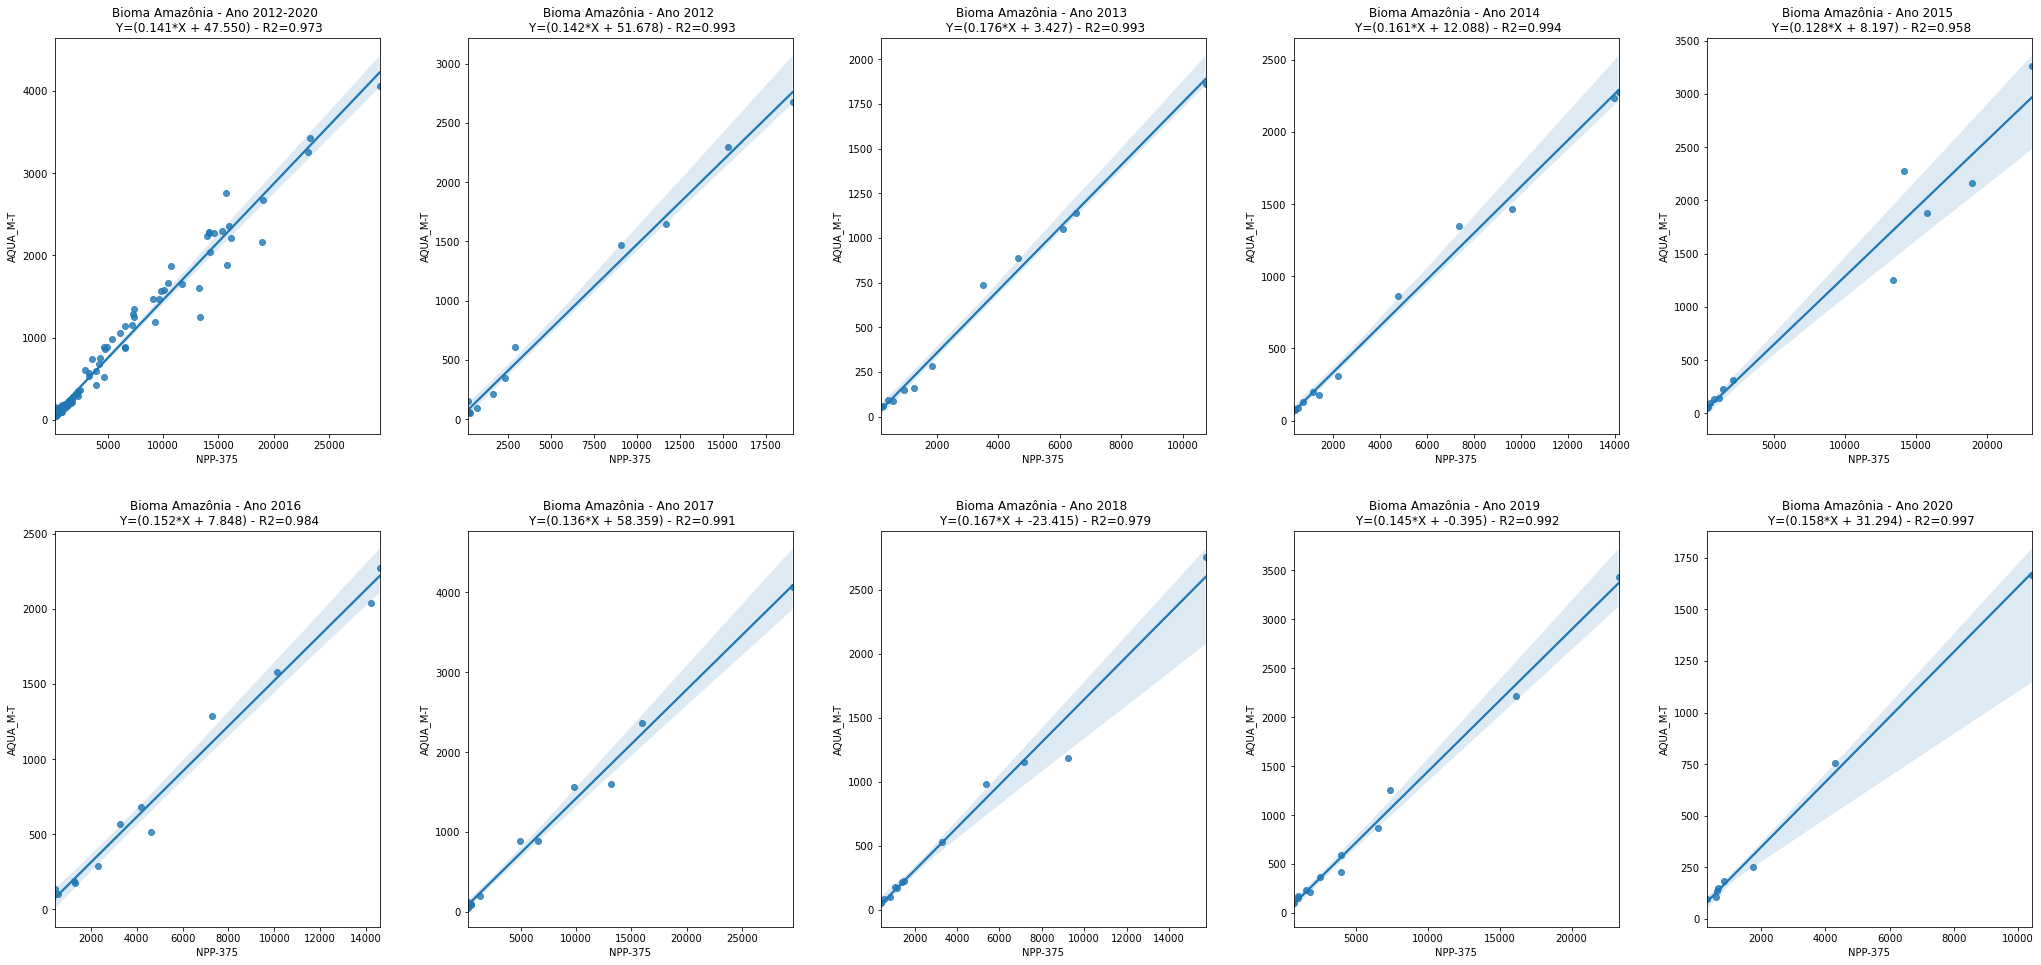



  Cerrado


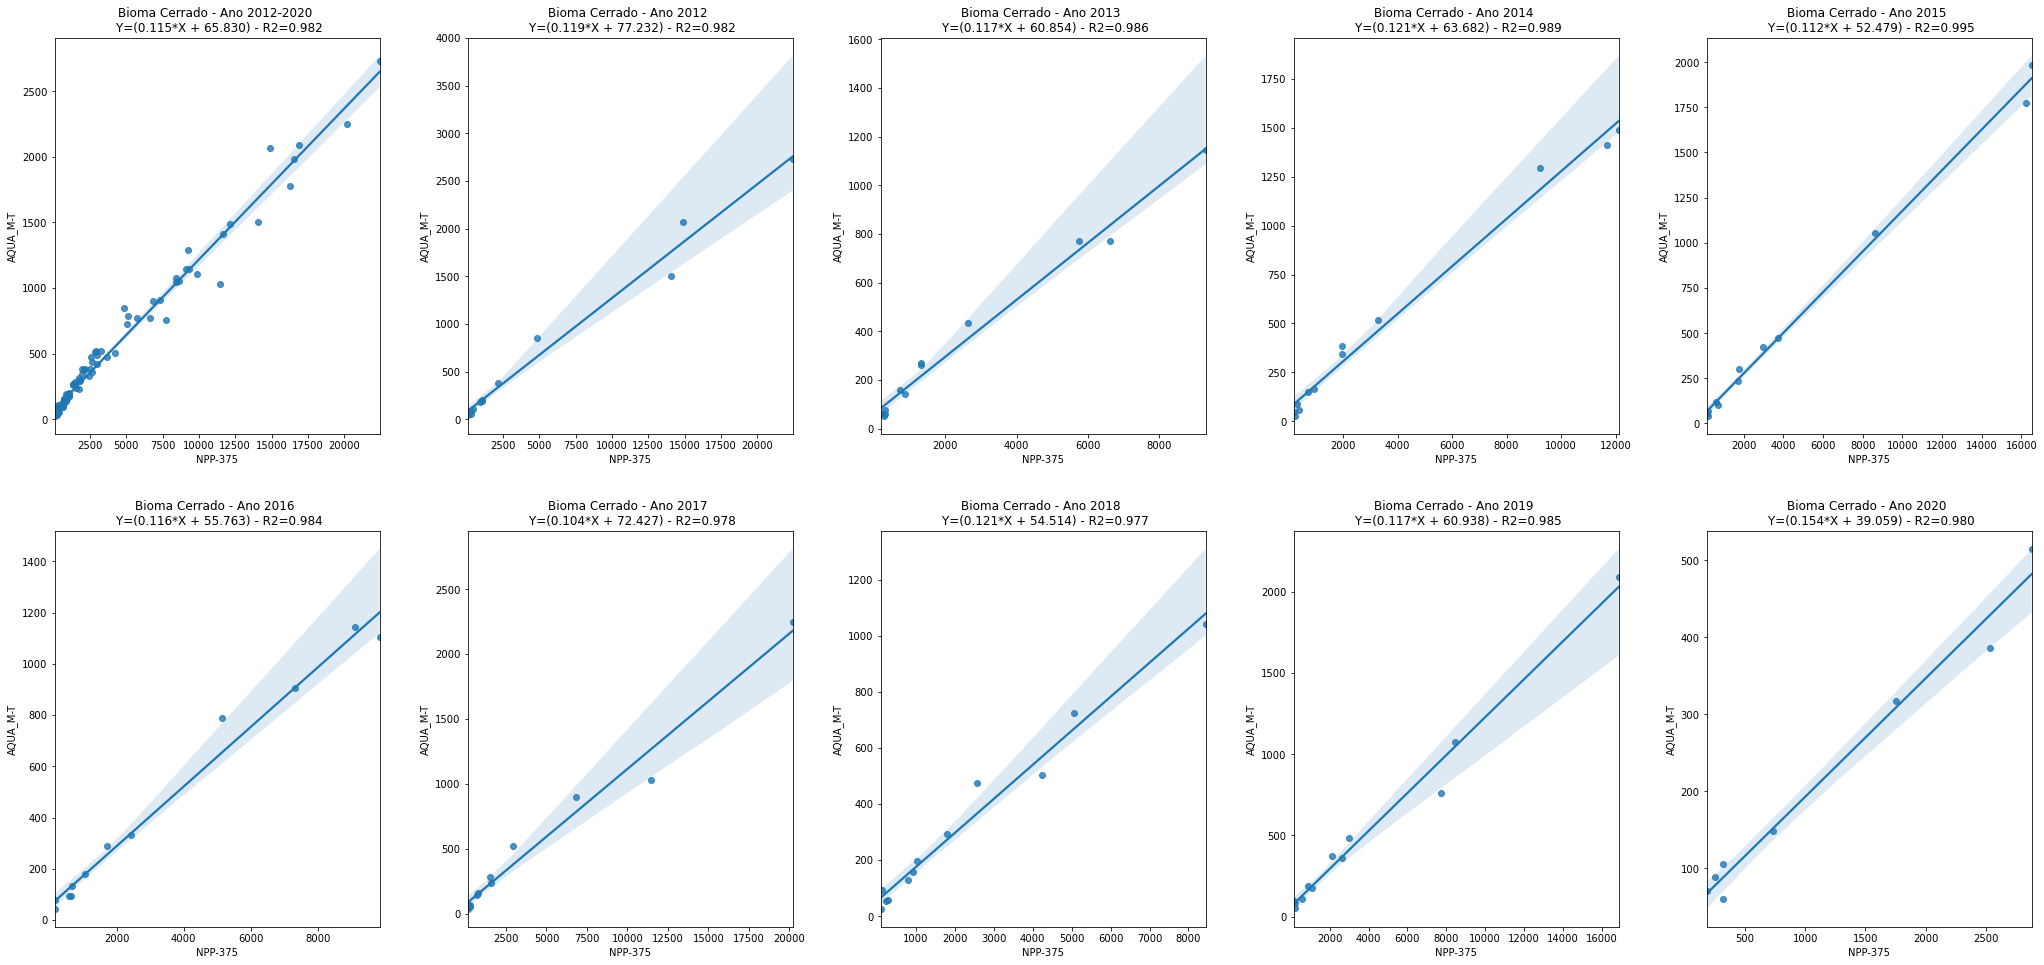



  Caatinga


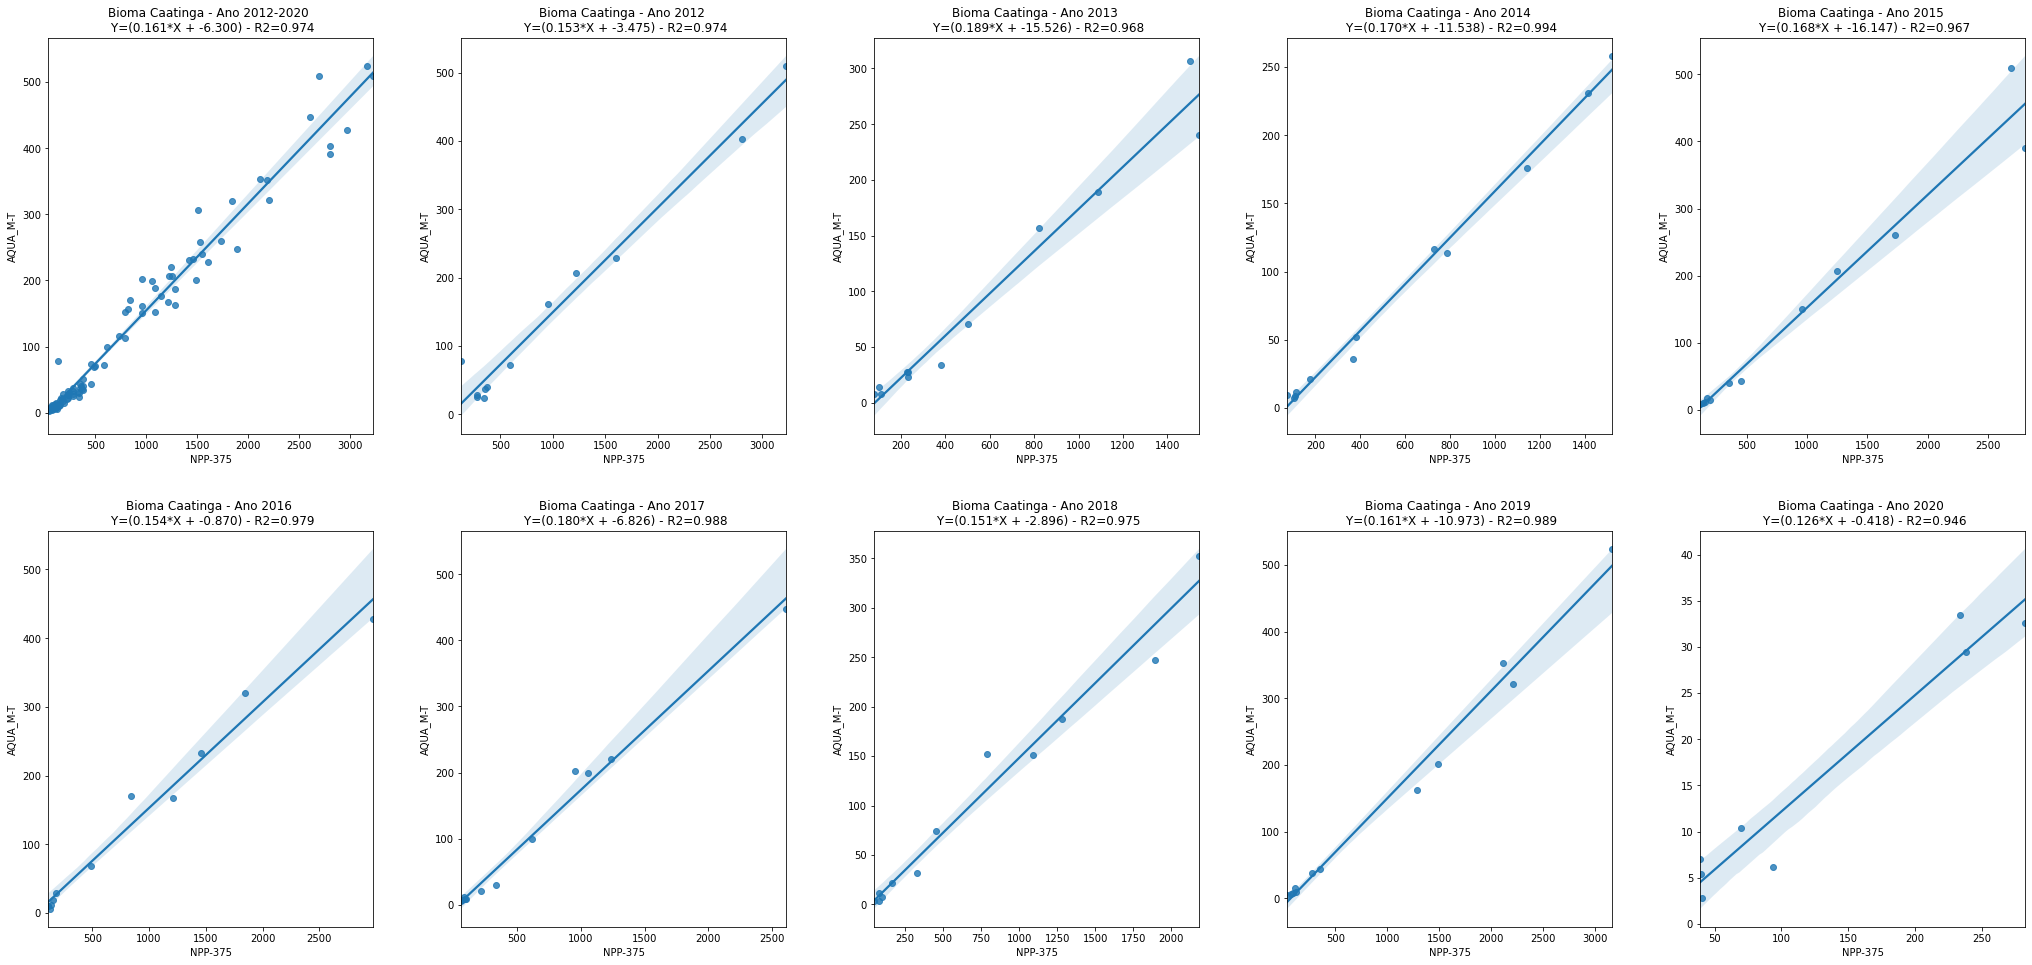



  Mata Atlântica


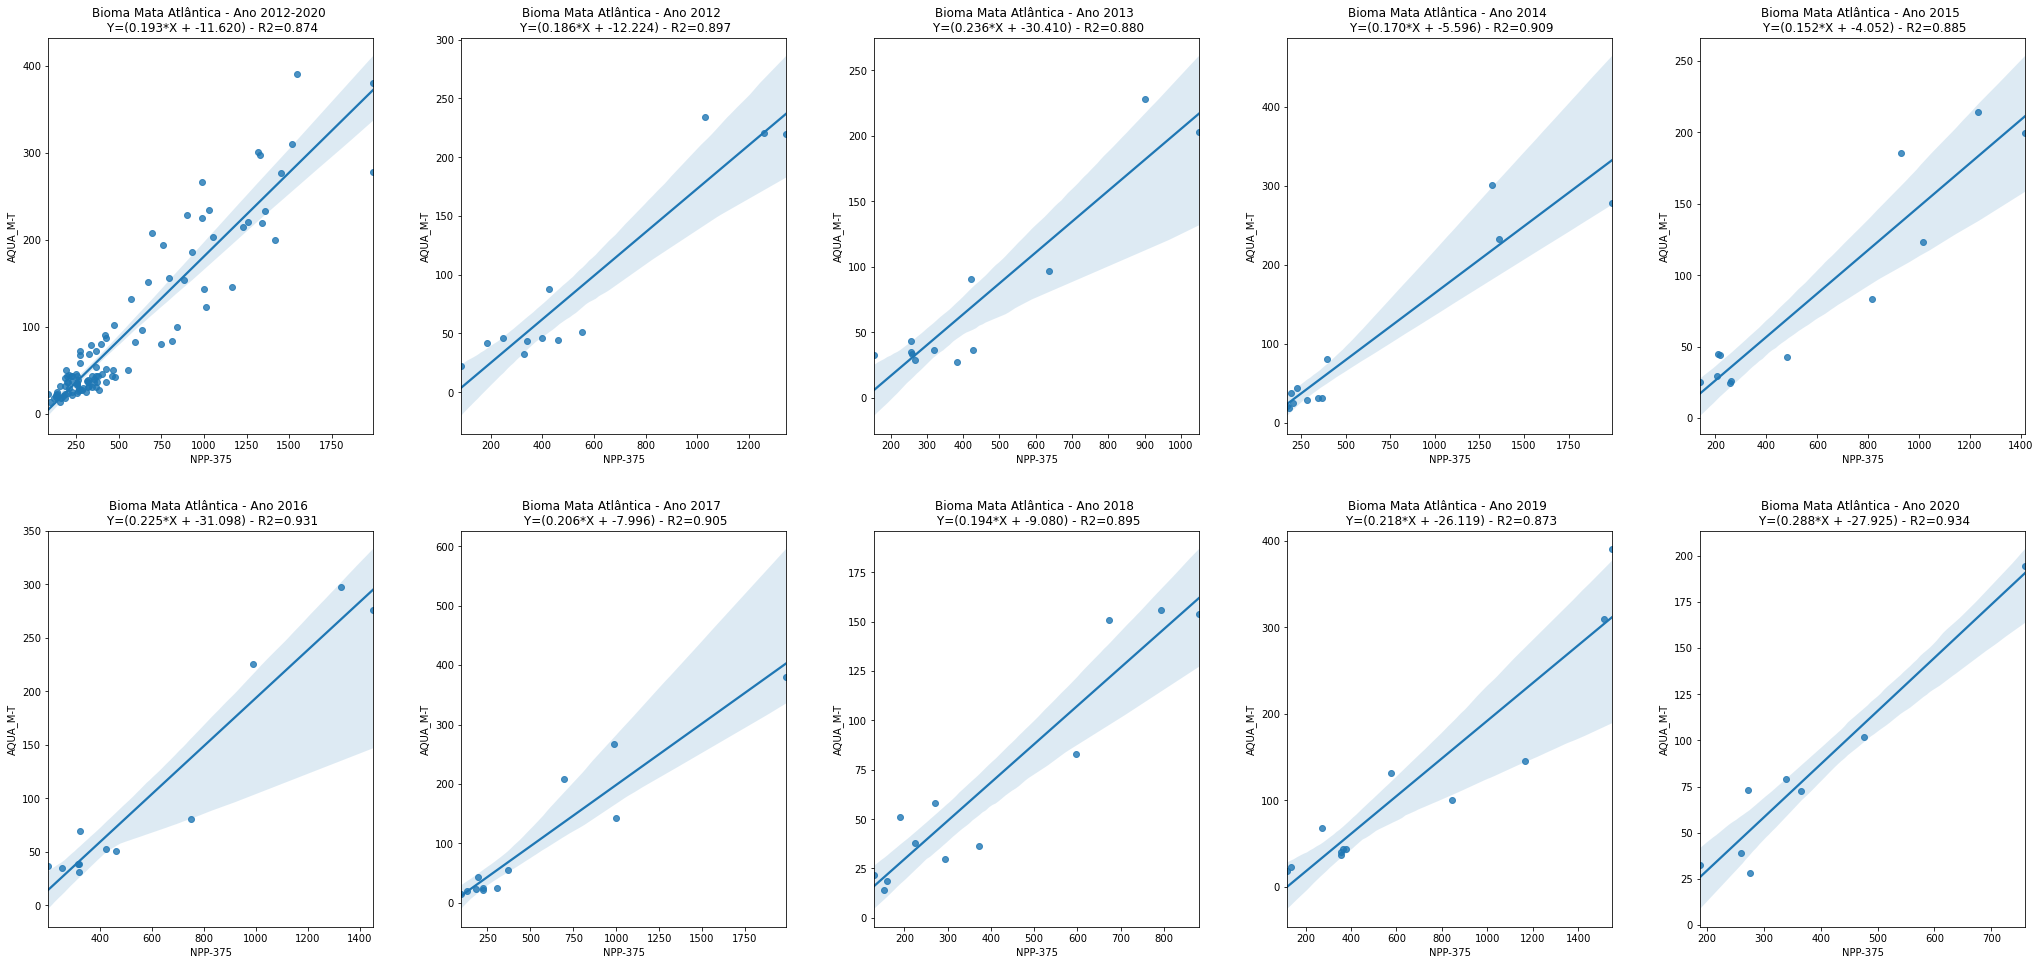



  Pampa


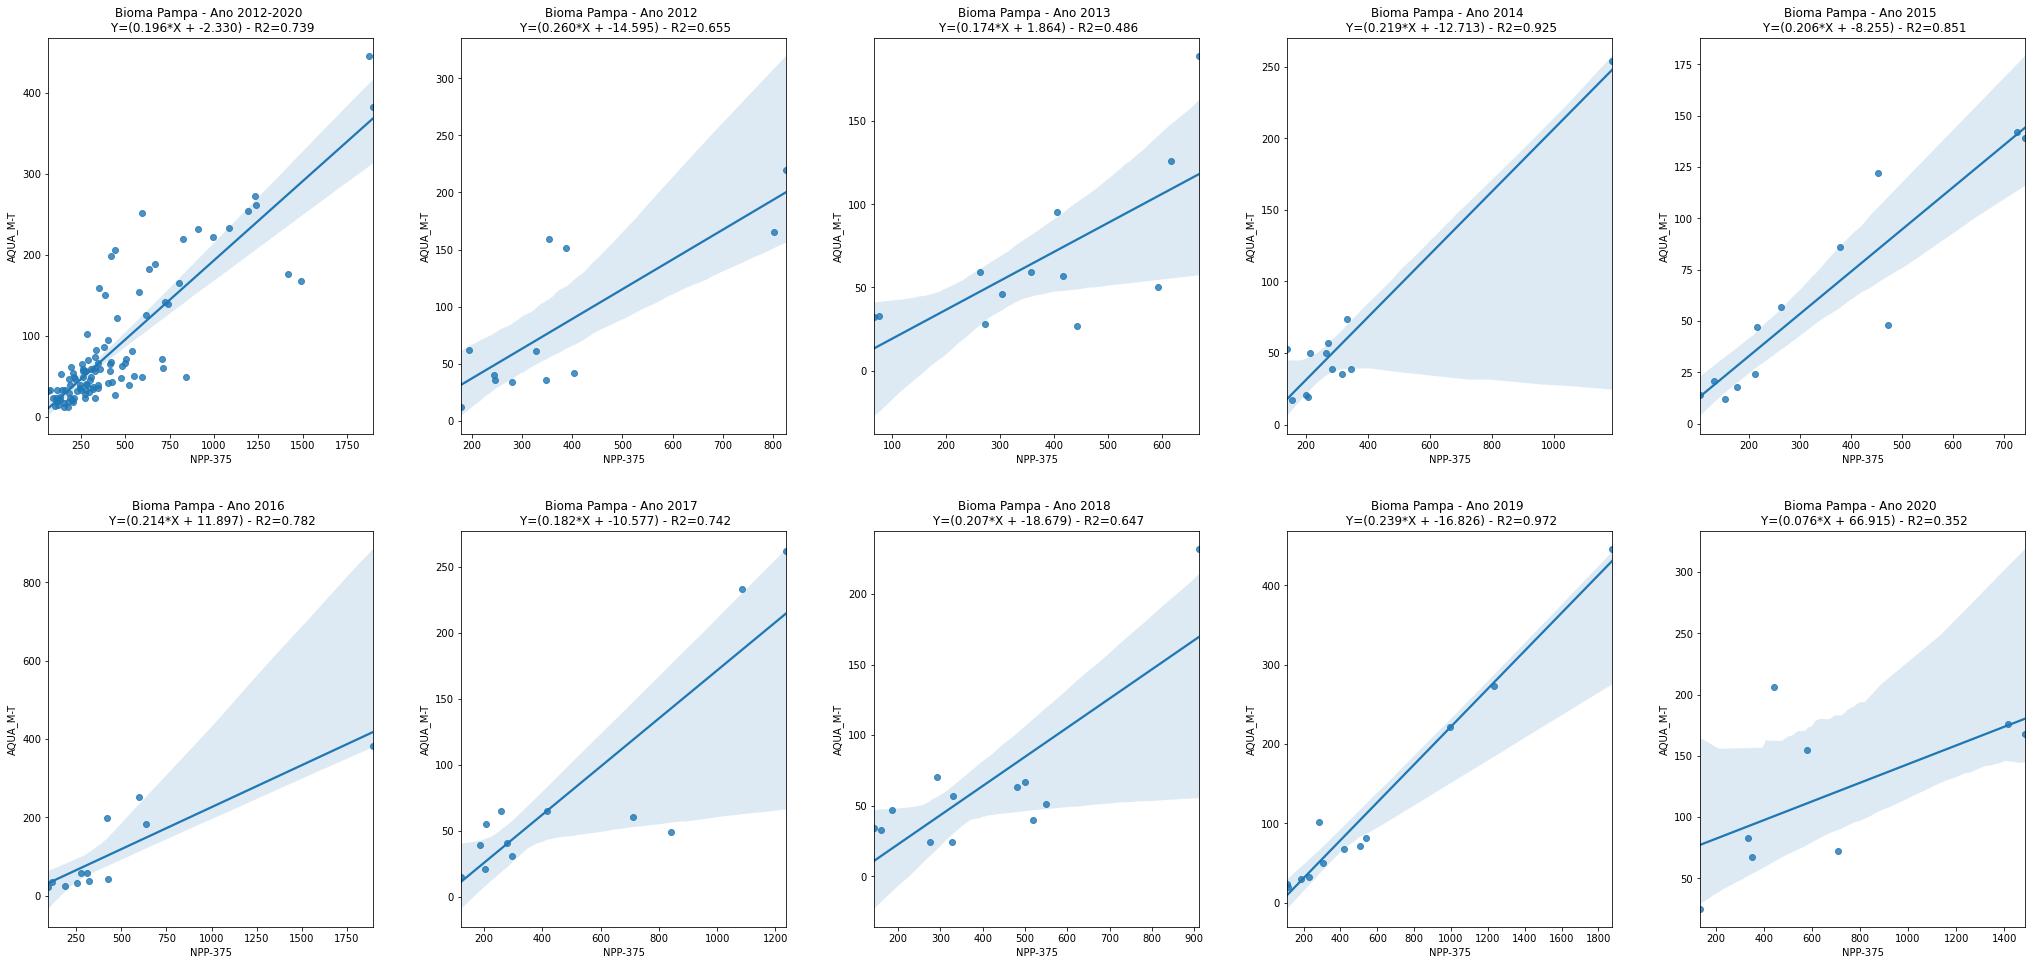



  Pantanal


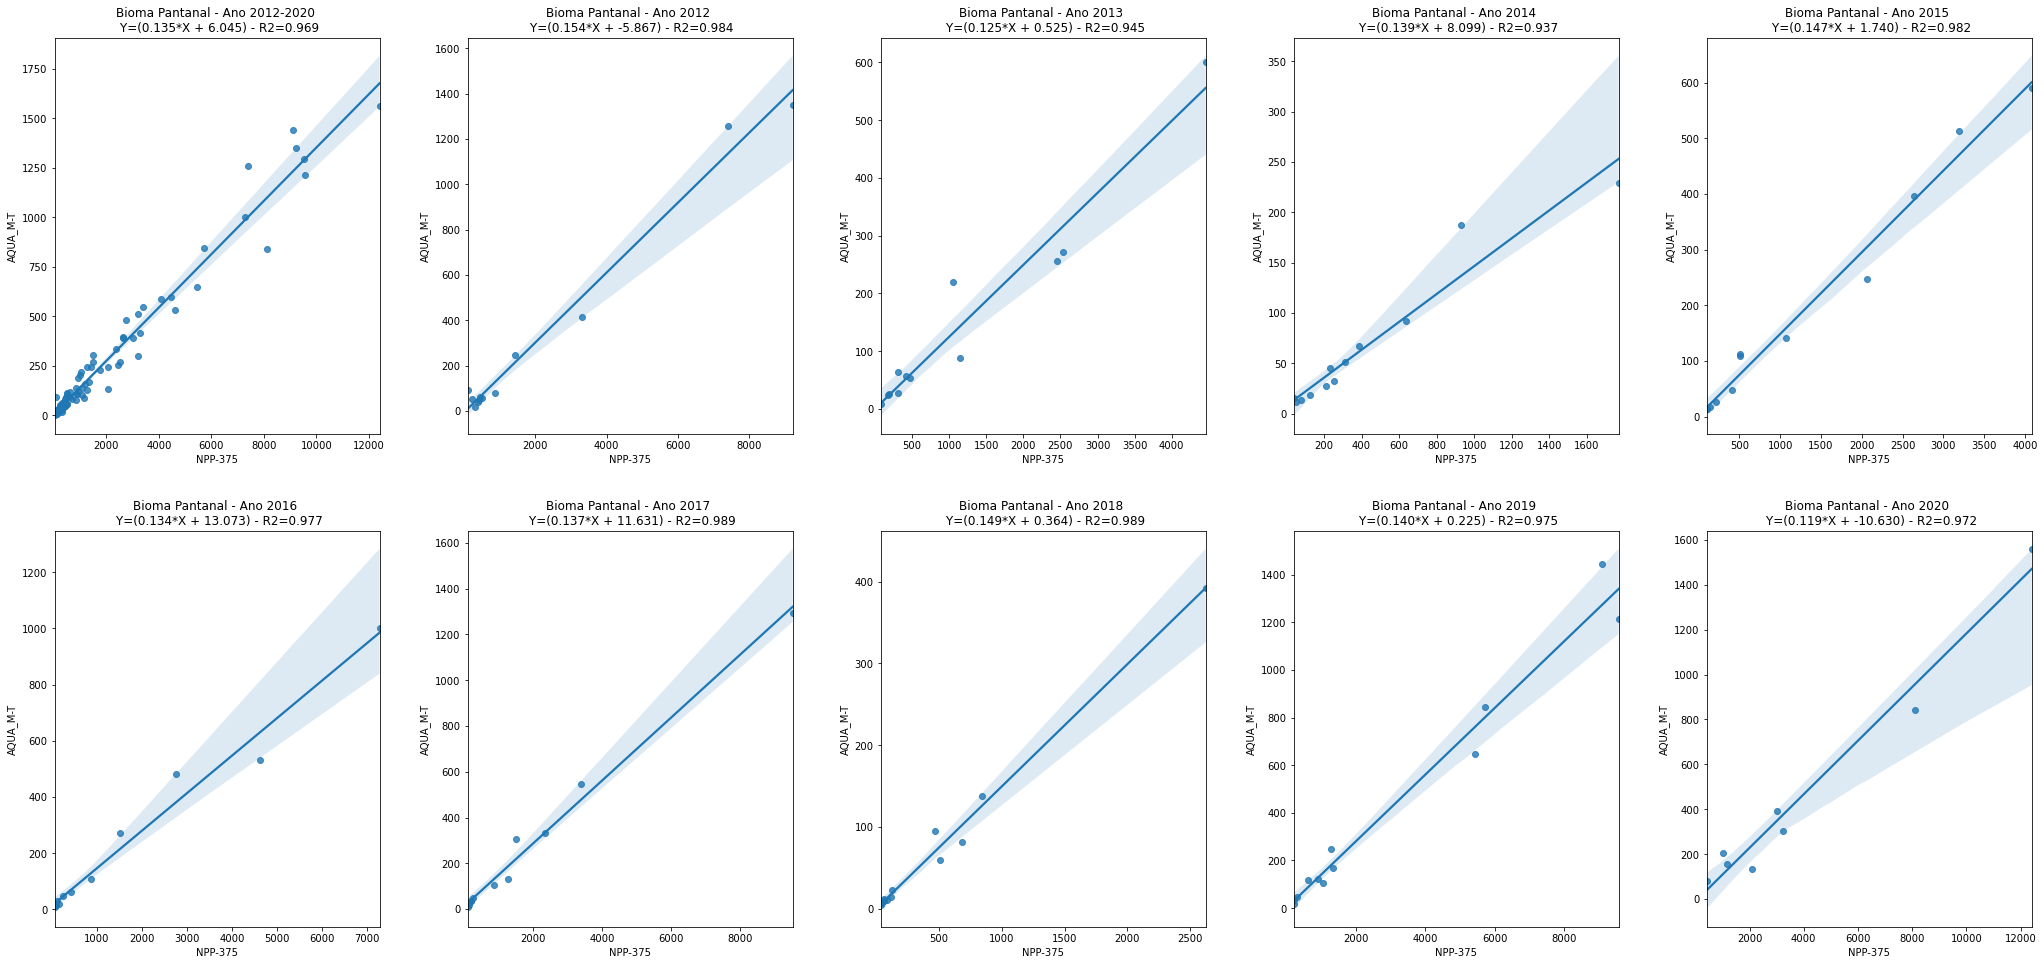

In [12]:
for bioma in focos.bioma.unique():
    print("\n\n ",bioma)
    focos_bioma = focos[focos.bioma == bioma][["data_mes", "satelite", "qtd"]]
    acum = focos_bioma.pivot_table(index='data_mes', columns=[ 'satelite'], aggfunc="mean", values='qtd', margins=False )
    acum = pd.DataFrame(acum.to_records())
    acum['ano']=acum.data_mes.dt.year
    
    slope, intercept, r_value, p_value, std_err = linregress( acum['NPP-375'], acum['AQUA_M-T'] )
    titulo = "Bioma {} - Ano {} \n Y=({:.3f}*X + {:.3f}) - R2={:.3f}".format(bioma, '2012-2020', slope, intercept, r_value**2)
    
    fig = plt.figure(figsize=(30,15))
    
    ax1 = fig.add_subplot(2,5,1, title=titulo)
    
    fig.tight_layout(pad=8.0)
#     plt.subplots_adjust(top=1, bottom=0.15, left=0.15, right=0.95, hspace=0.85, wspace=0.15)
#     plt.subplots_adjust(hspace=1.5)
    # Create the graph of linear model
    ax1 = sns.regplot(x="NPP-375", y="AQUA_M-T" ,data=acum, ax=ax1, label='s')
 
    
    idx = 2
    for ano in range(2012,2021):

        if focos_bioma[focos_bioma.data_mes.dt.year == int(ano)].size > 0:

            # filtra dados para o ano 
            focos_bioma_ano = focos_bioma[focos_bioma.data_mes.dt.year == int(ano)]

            acum = focos_bioma_ano.pivot_table(index='data_mes', columns=[ 'satelite'], aggfunc="mean", values='qtd', margins=False )
            acum = pd.DataFrame(acum.to_records())

            slope, intercept, r_value, p_value, std_err = linregress( acum['NPP-375'], acum['AQUA_M-T'] )
            titulo = "Bioma {} - Ano {} \n Y=({:.3f}*X + {:.3f}) - R2={:.3f}".format(bioma, ano, slope, intercept, r_value**2)
            ax2 = plt.subplot(2,5, idx , title='{}'.format(titulo))

            ax2 = sns.regplot(x="NPP-375", y="AQUA_M-T" ,data=acum, ax=ax2, label='s')
            idx = idx + 1
        else:
            ax2 = plt.subplot(5,2, idx , title='{}'.format("AUSENCIA DE DADOS"))
            idx = idx + 1
    plt.show()



  ACRE


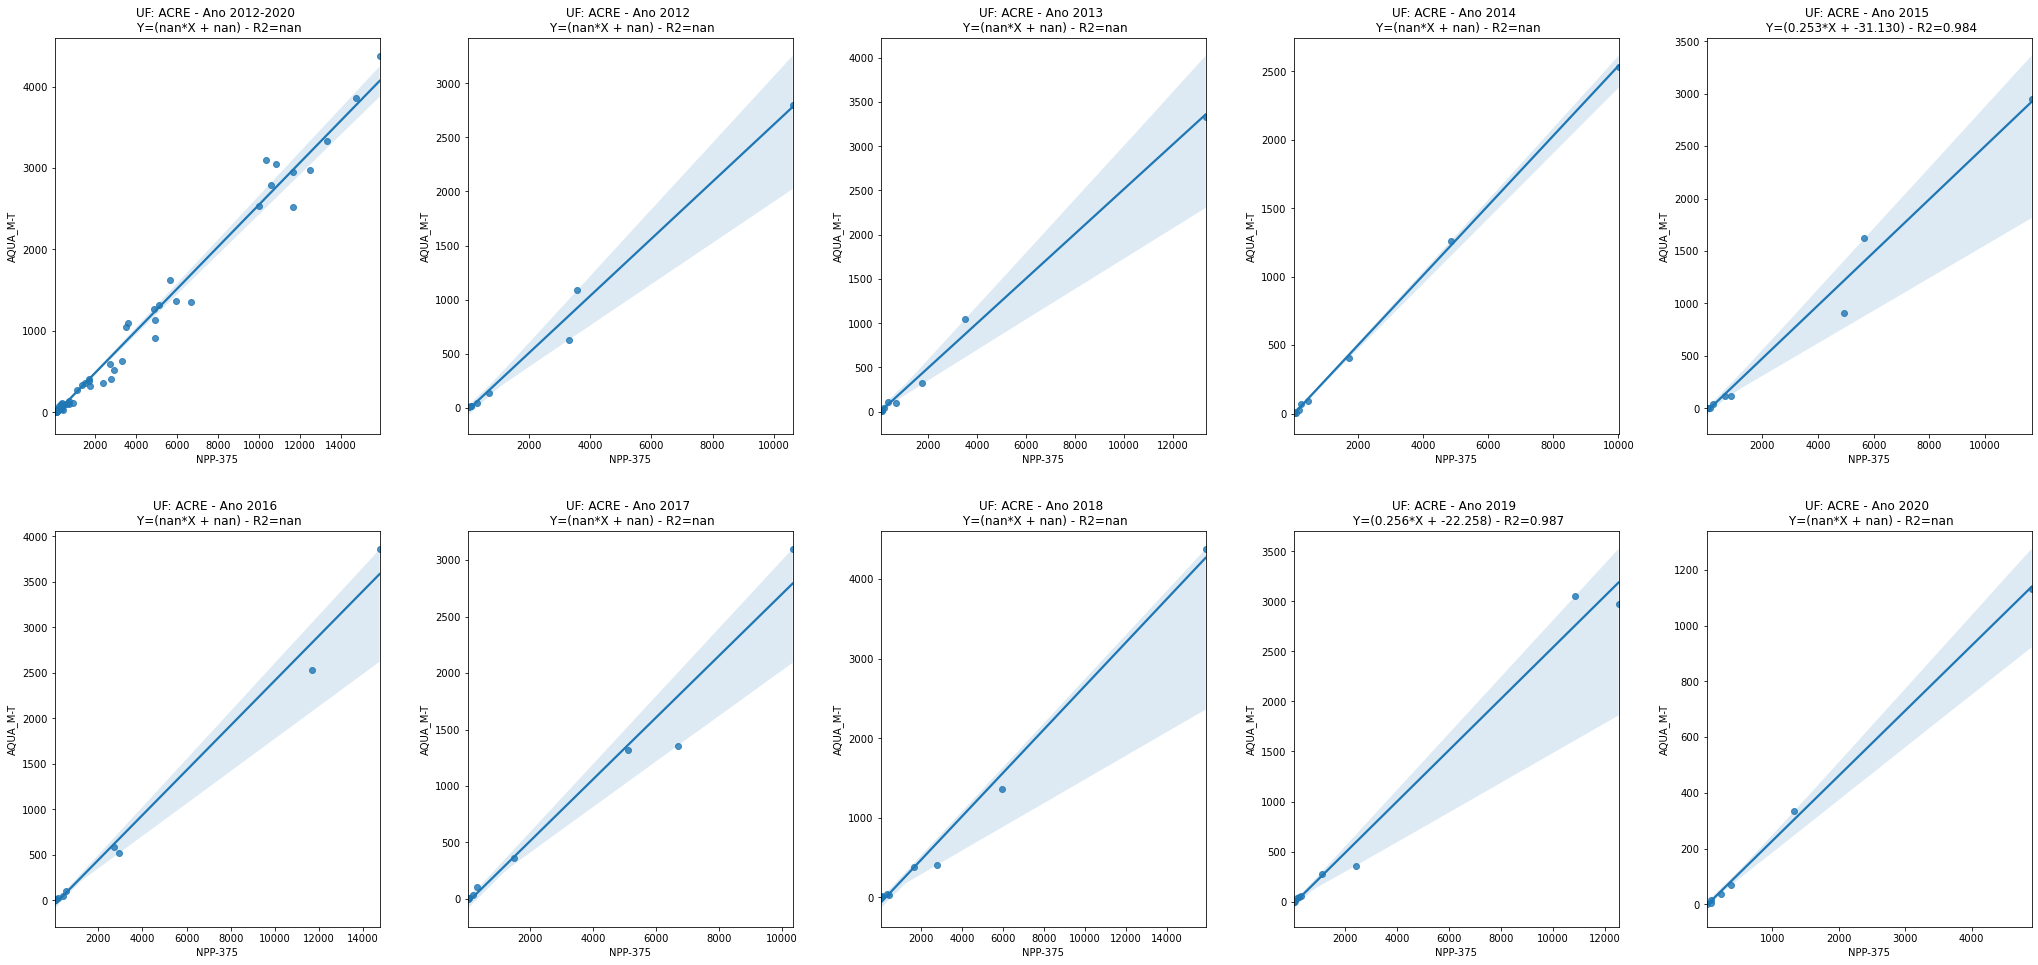



  ALAGOAS


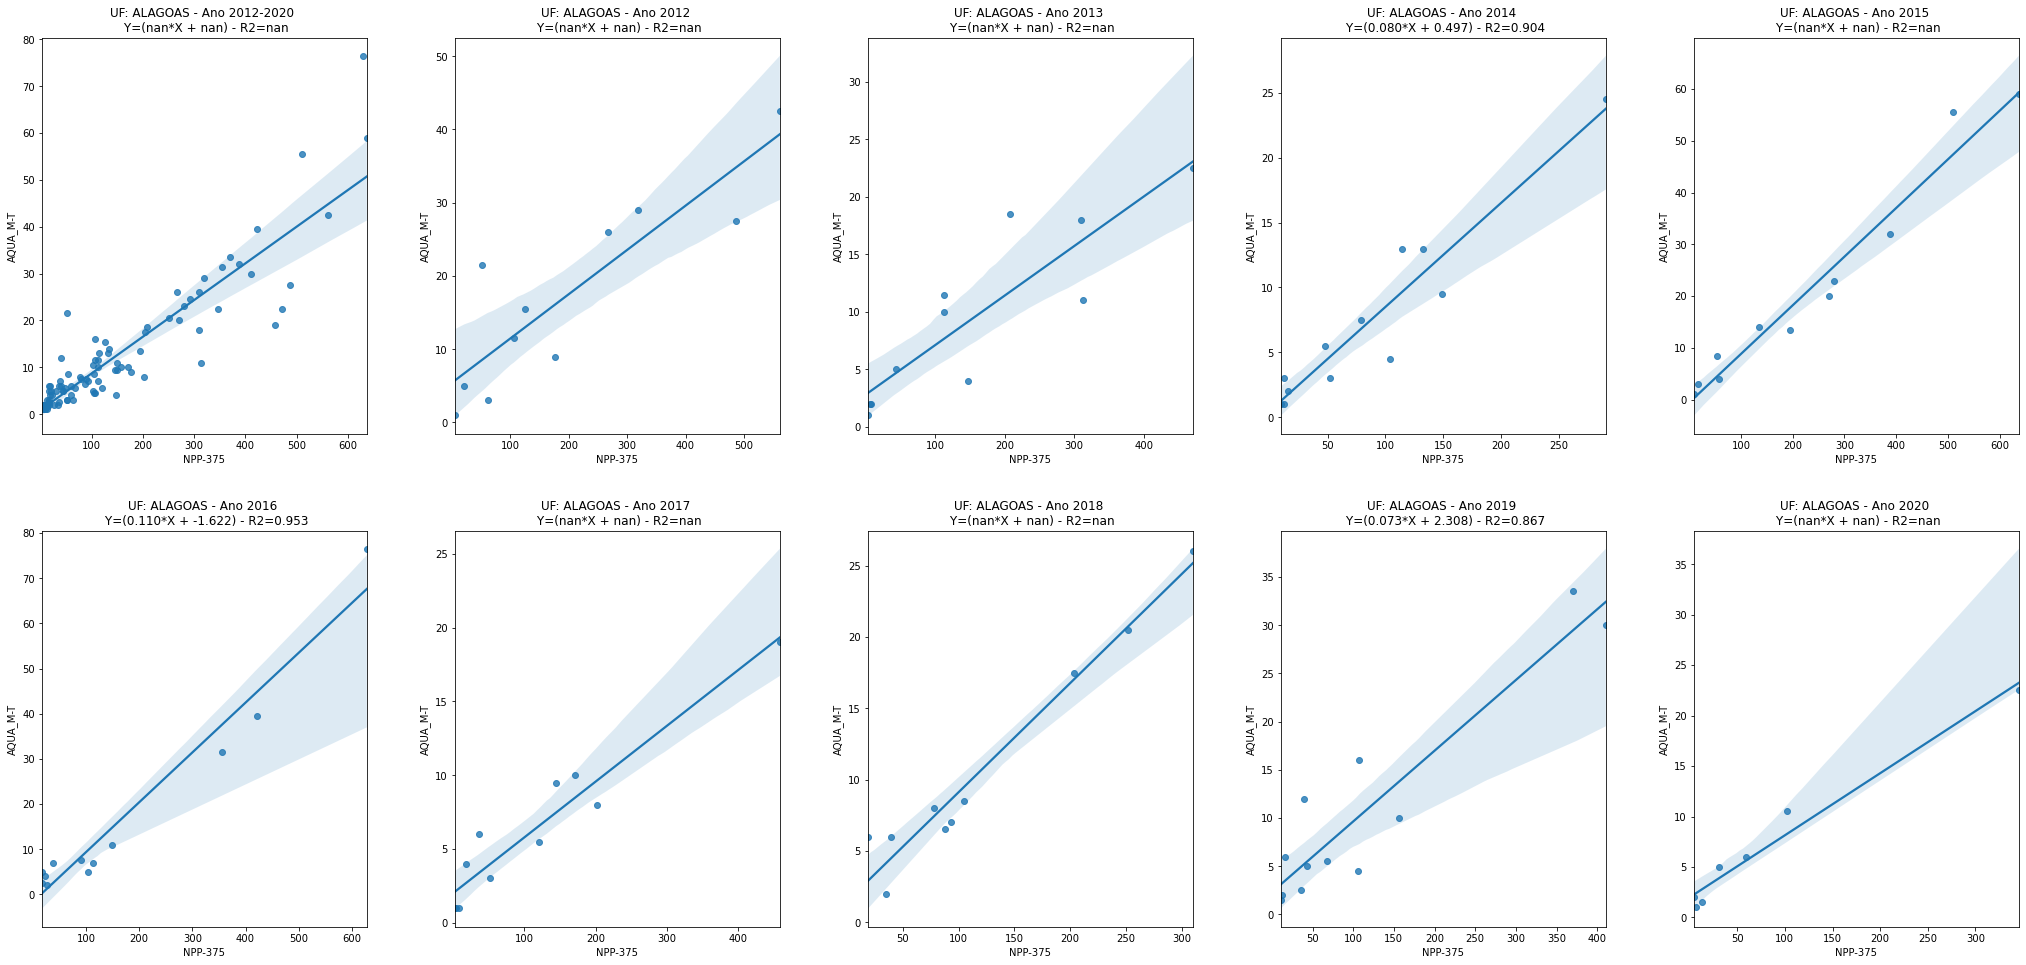



  AMAPÁ


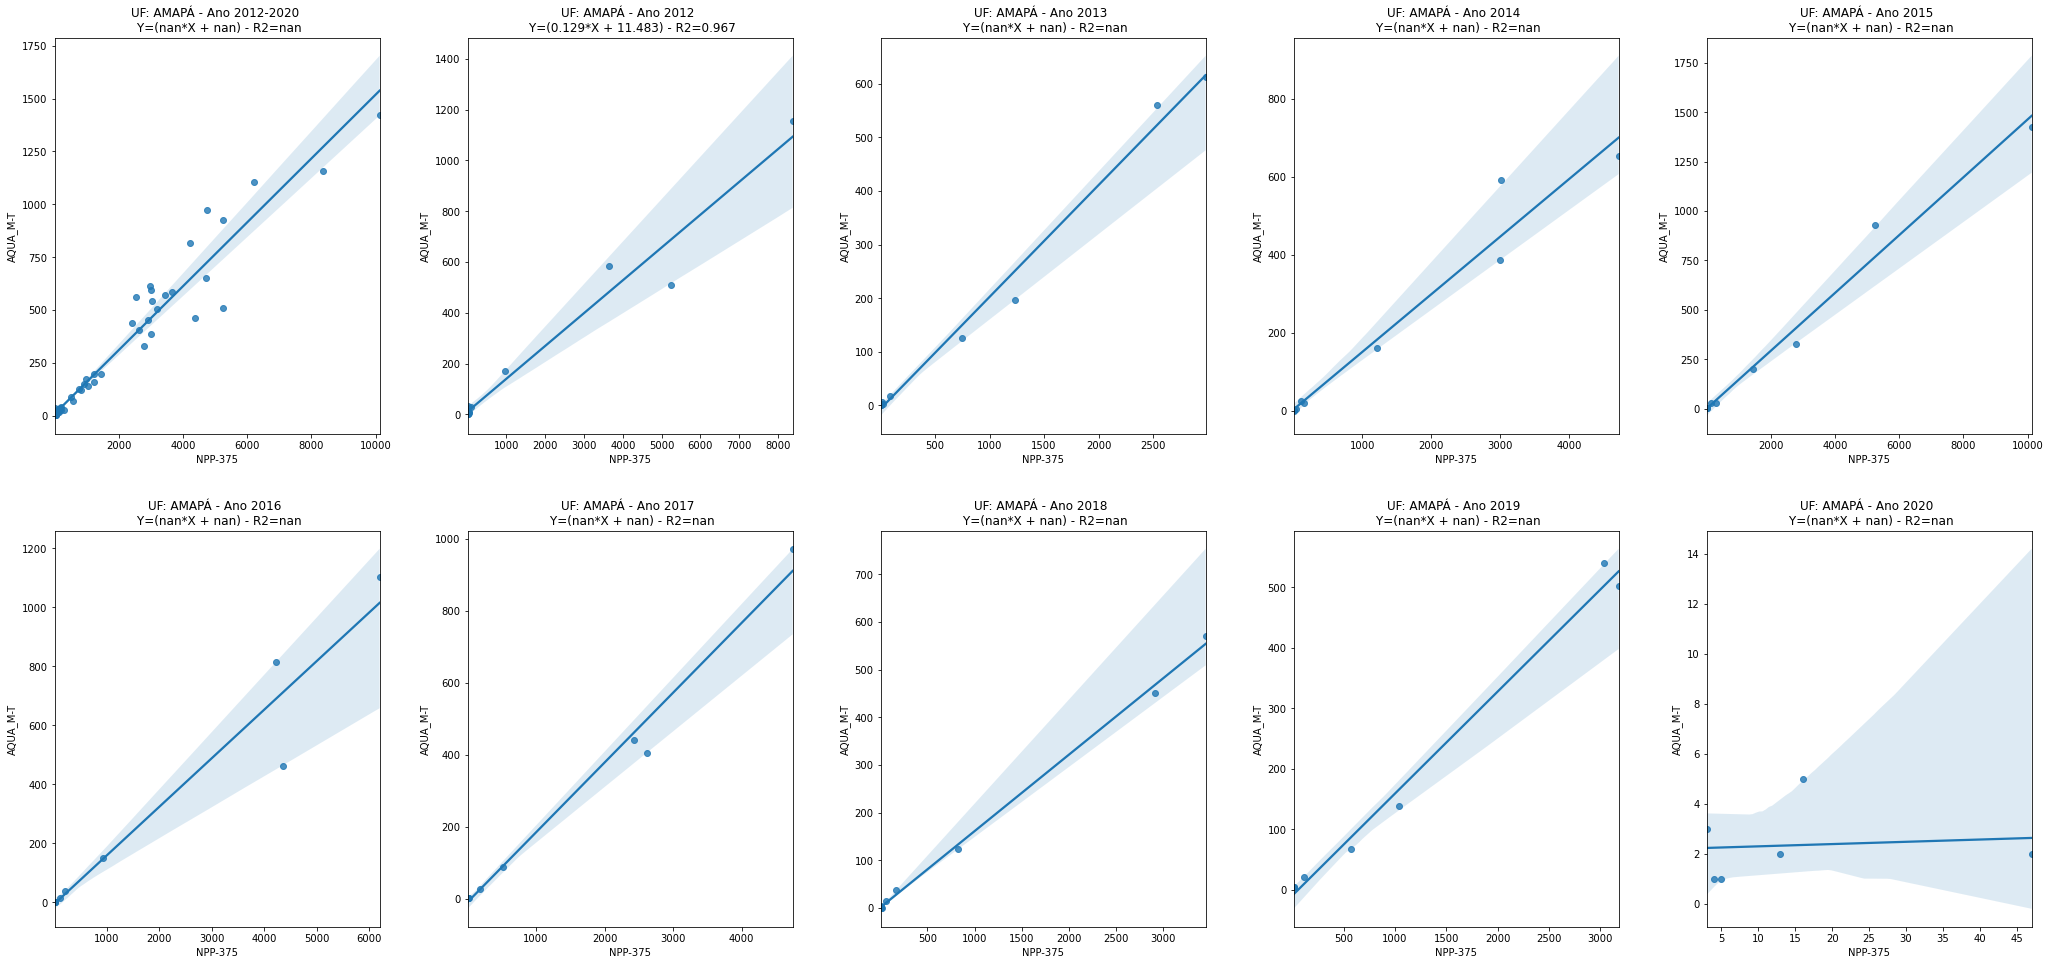



  AMAZONAS


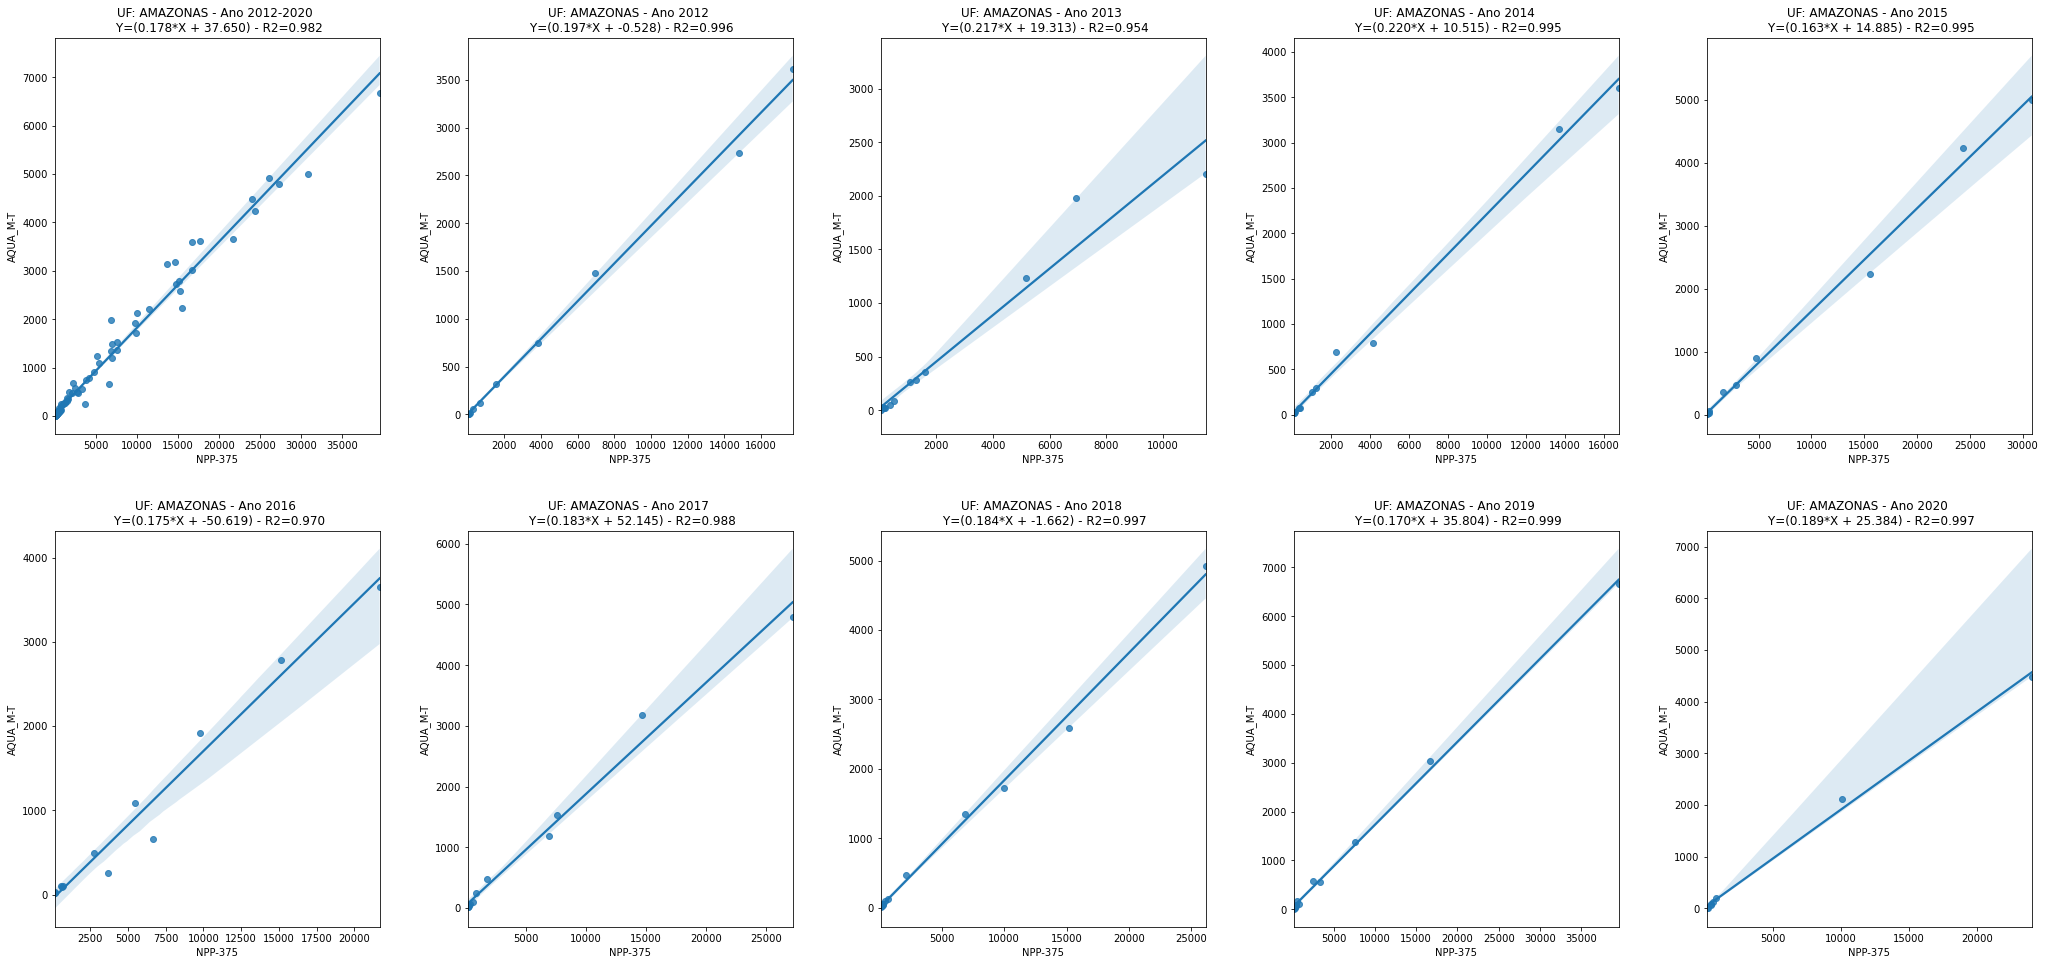



  BAHIA


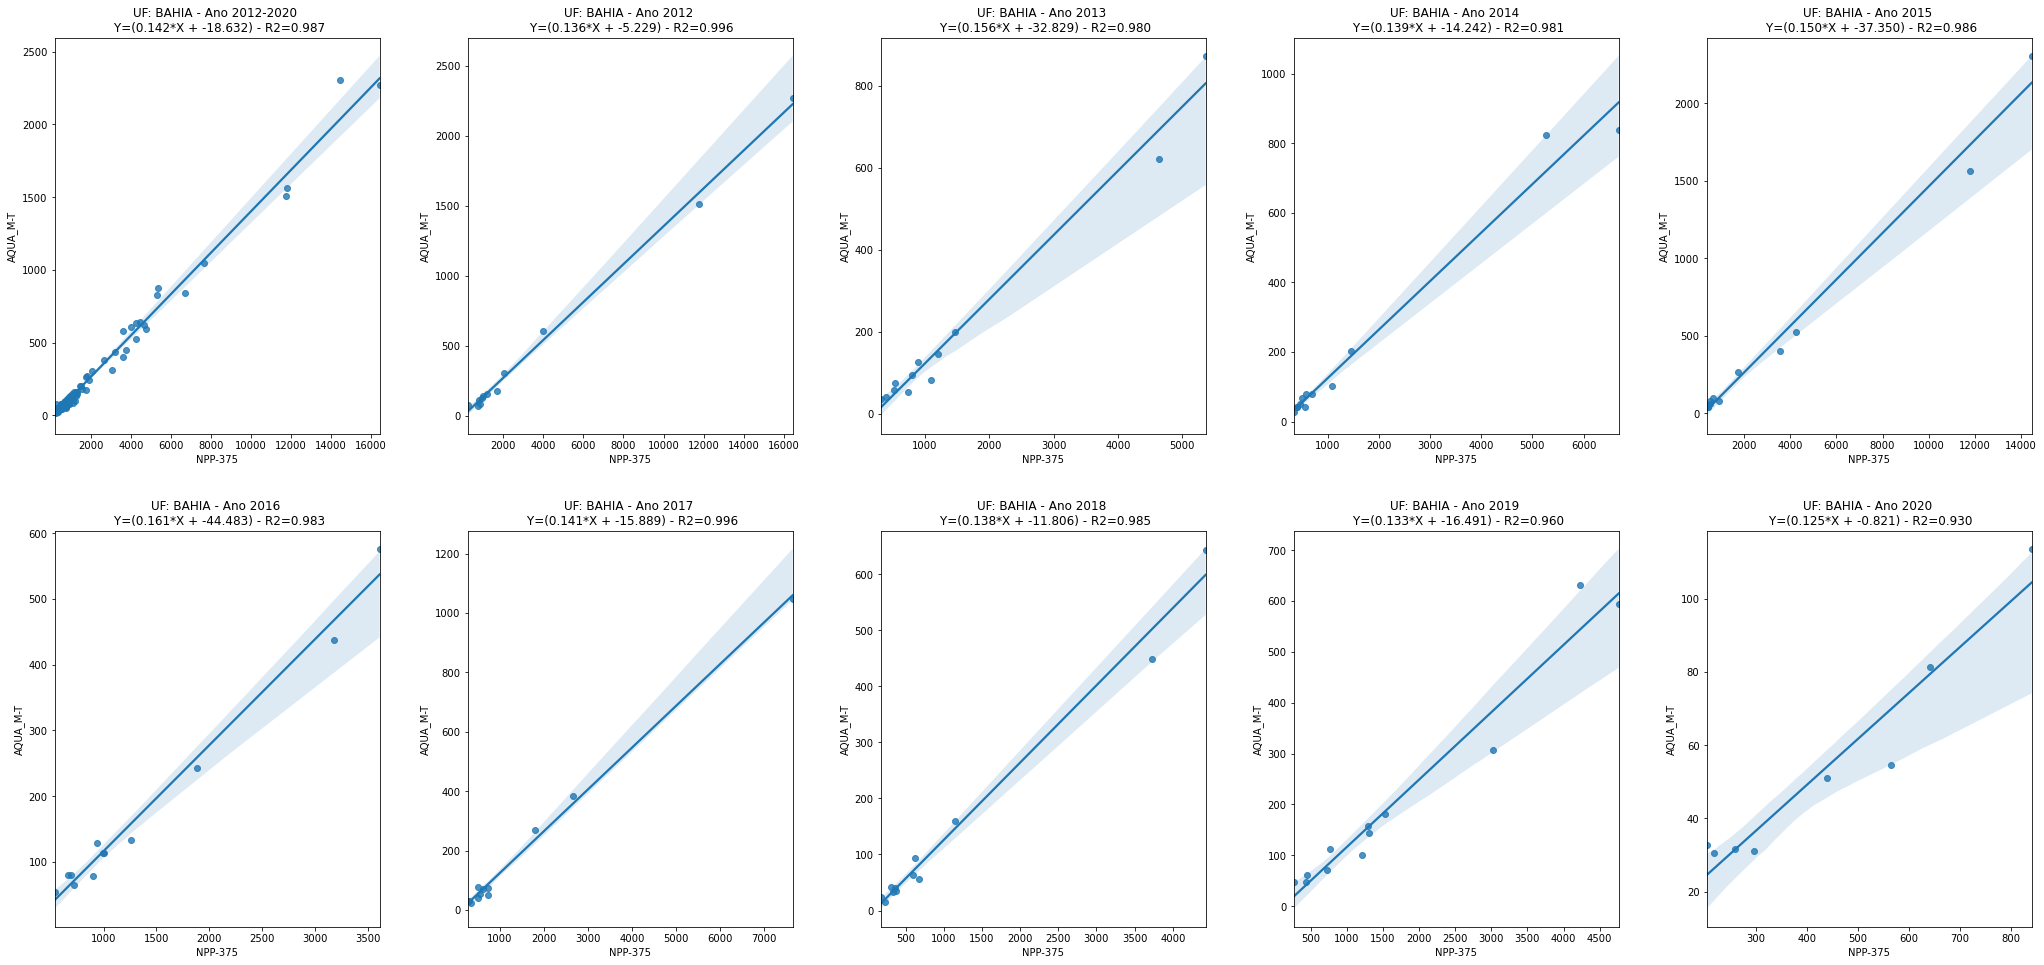



  CEARÁ


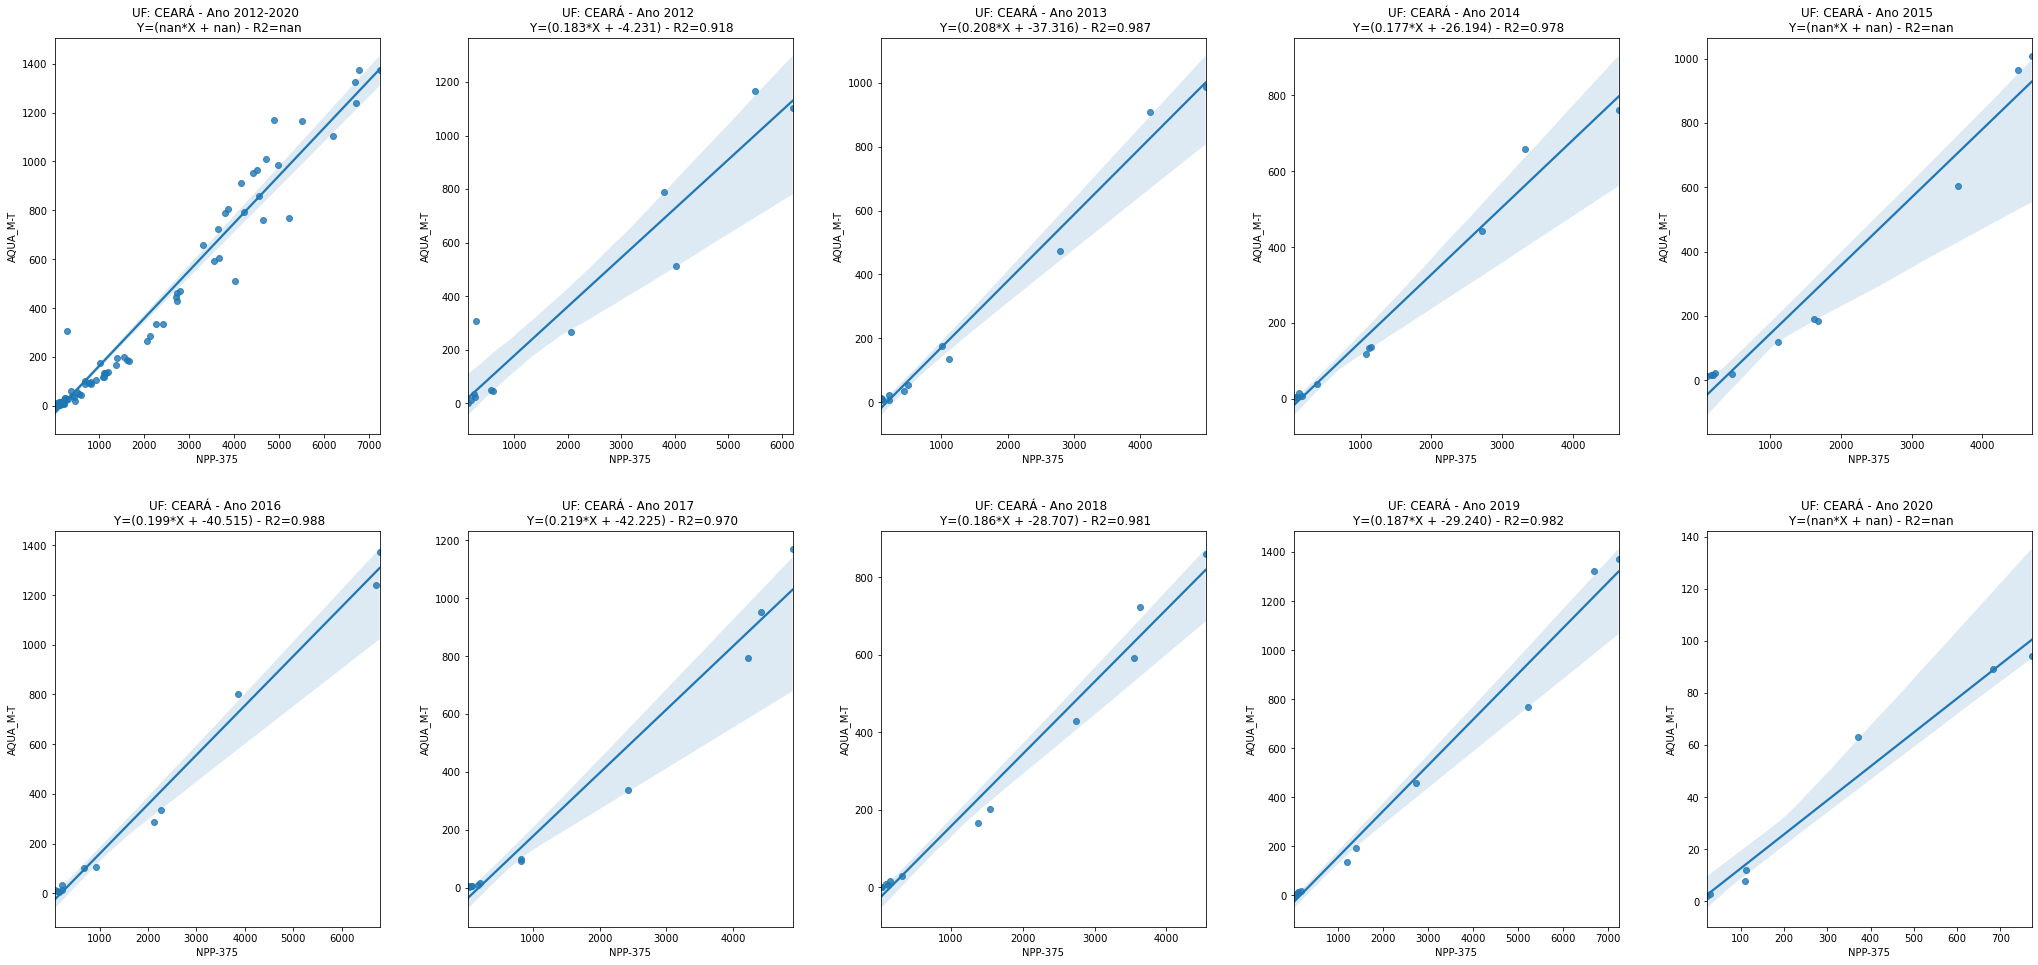



  DISTRITO FEDERAL


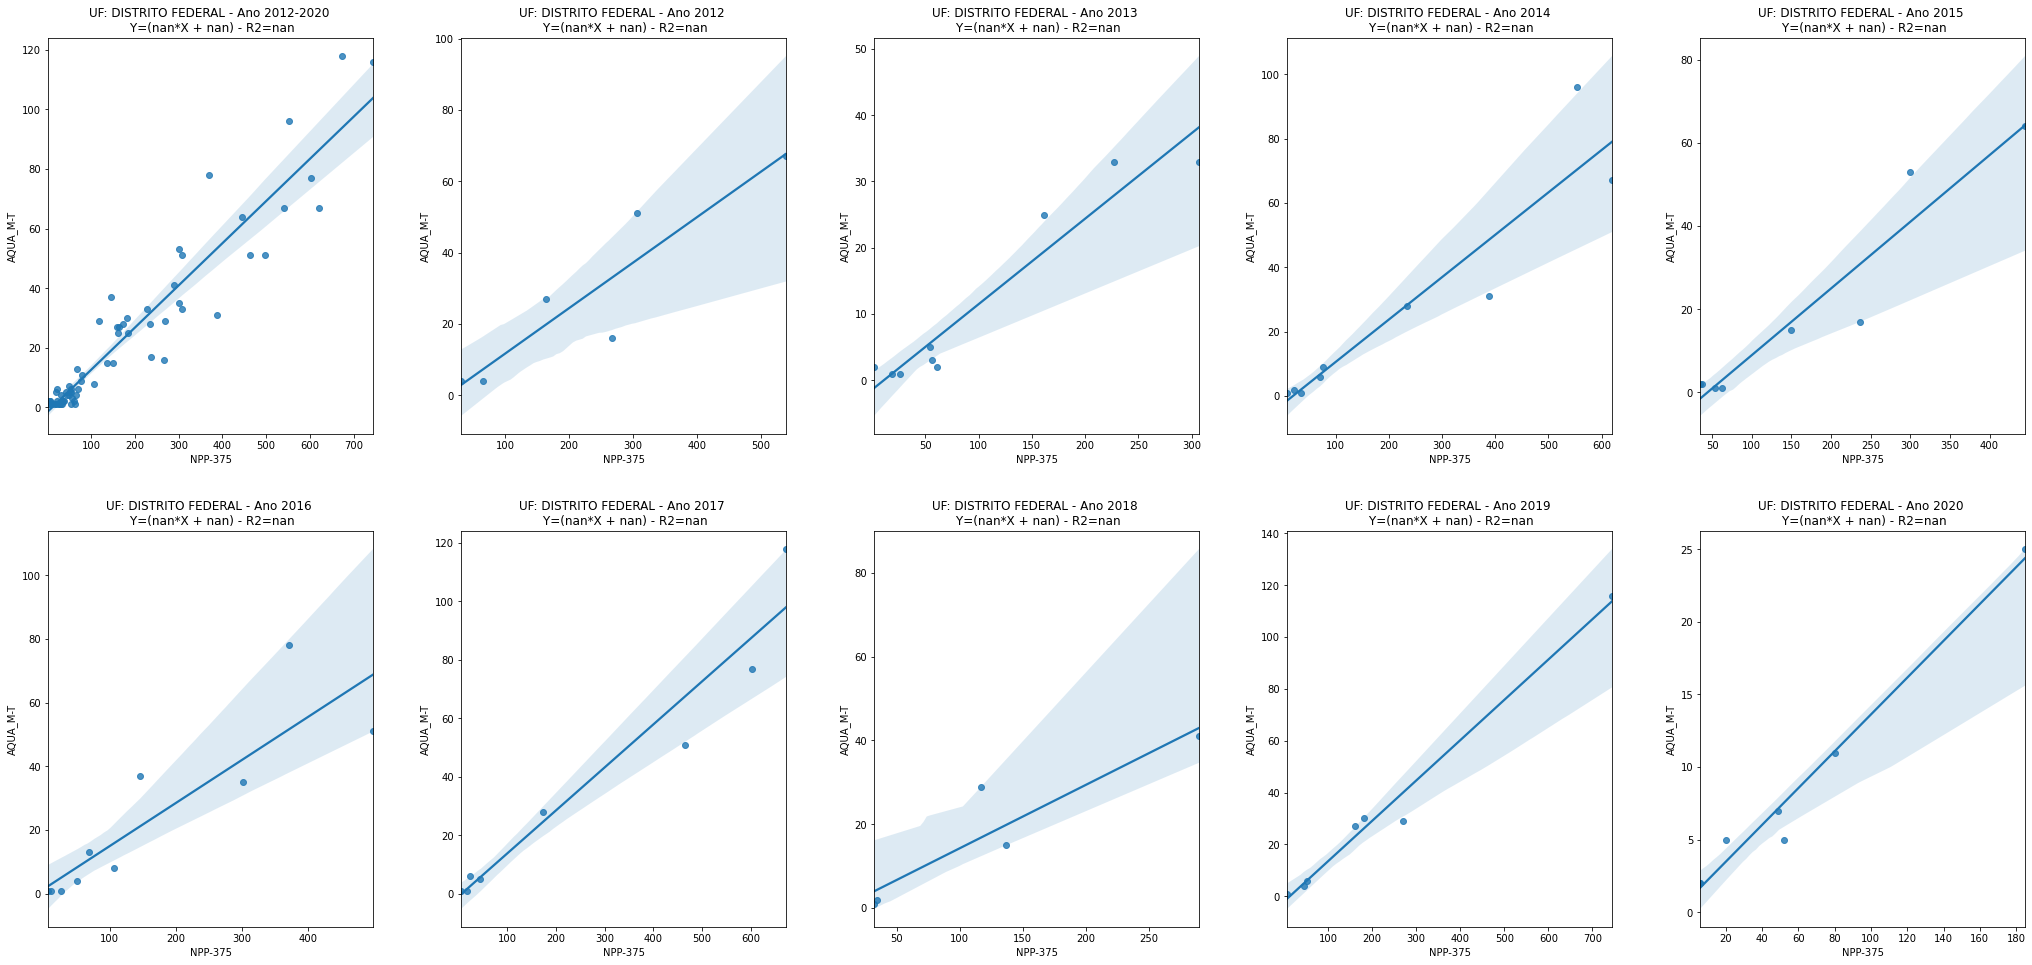



  ESPÍRITO SANTO


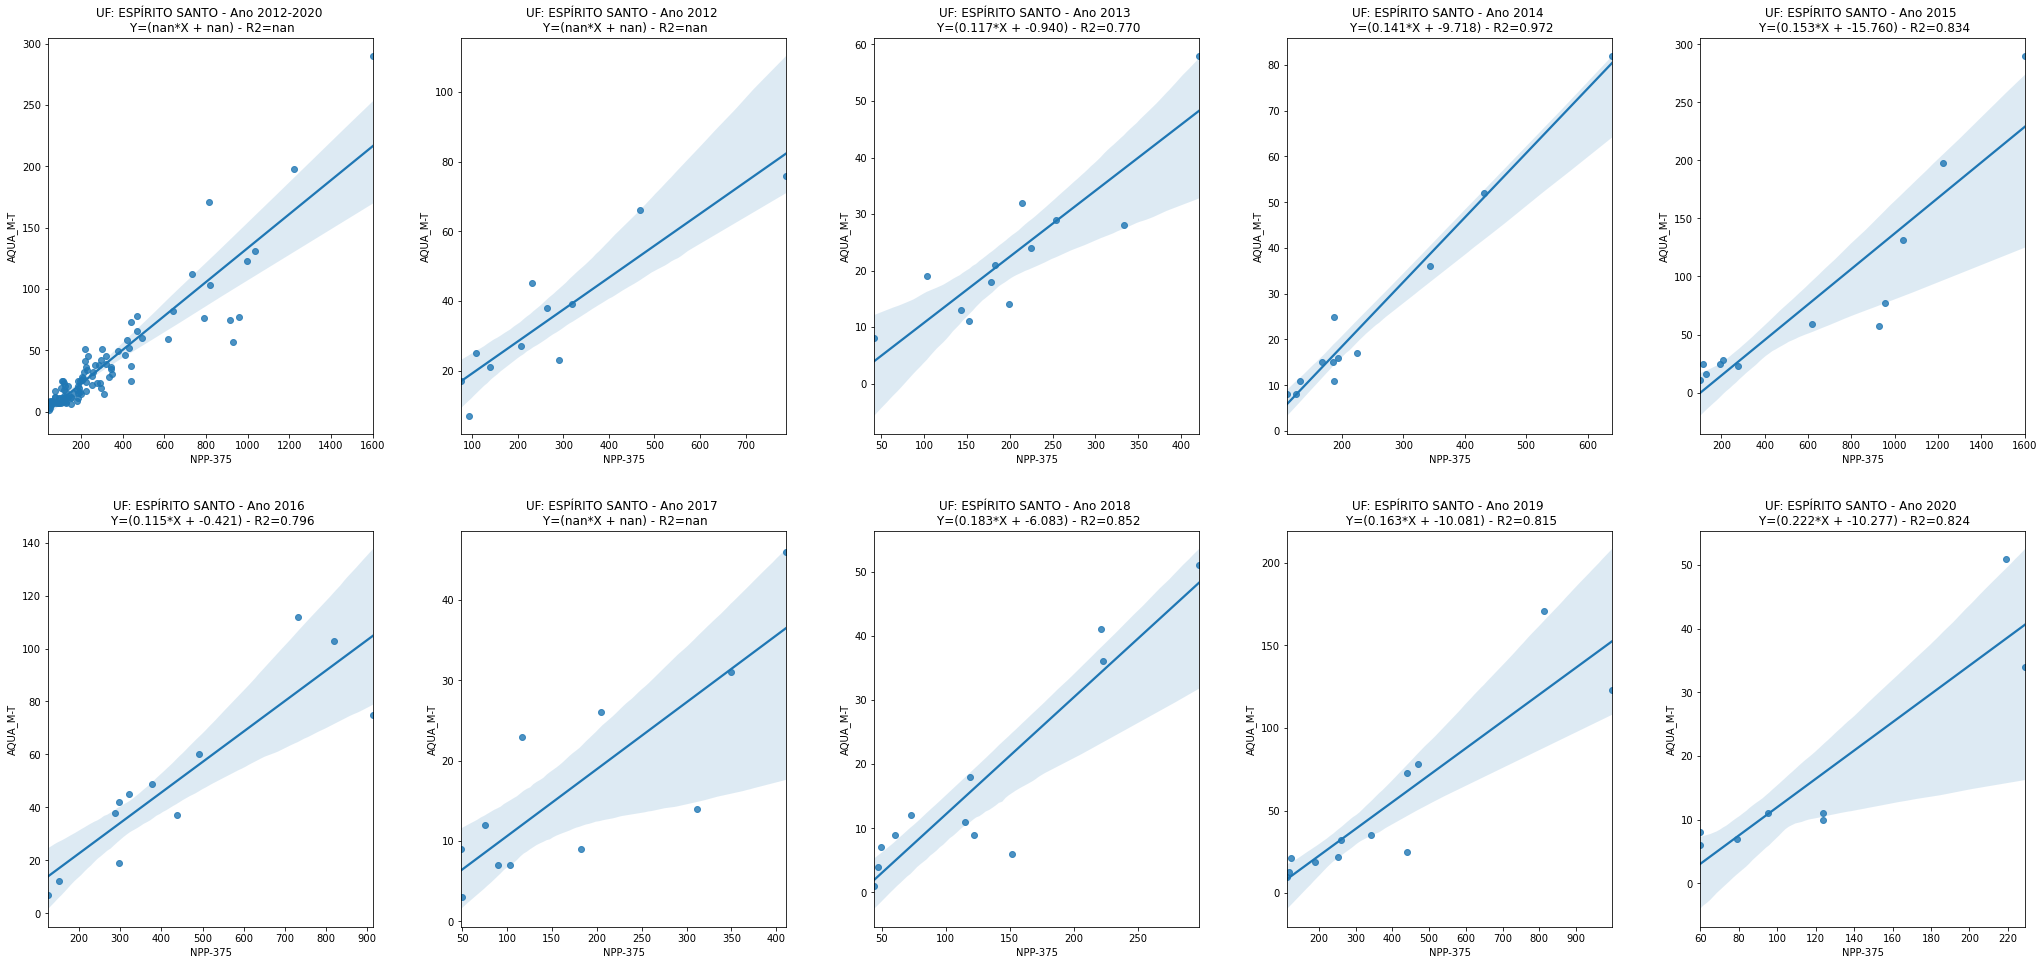



  GOIÁS


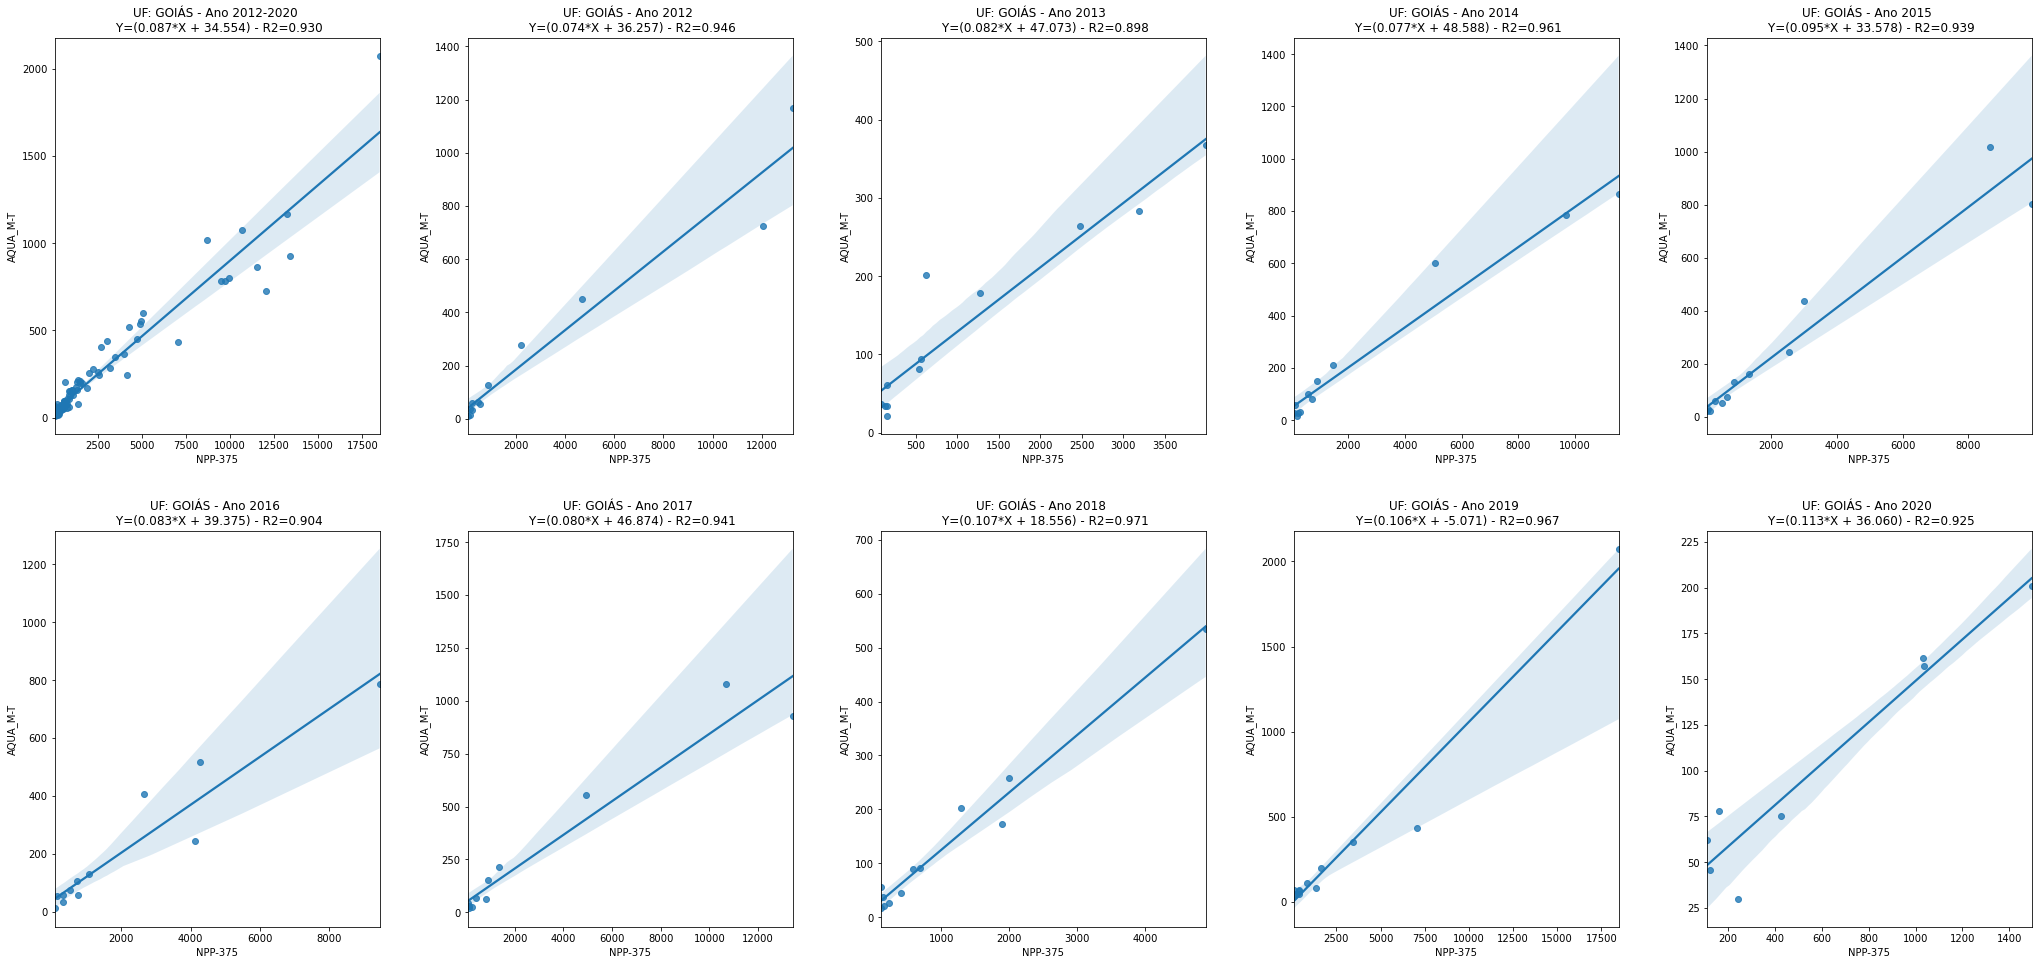



  MARANHÃO


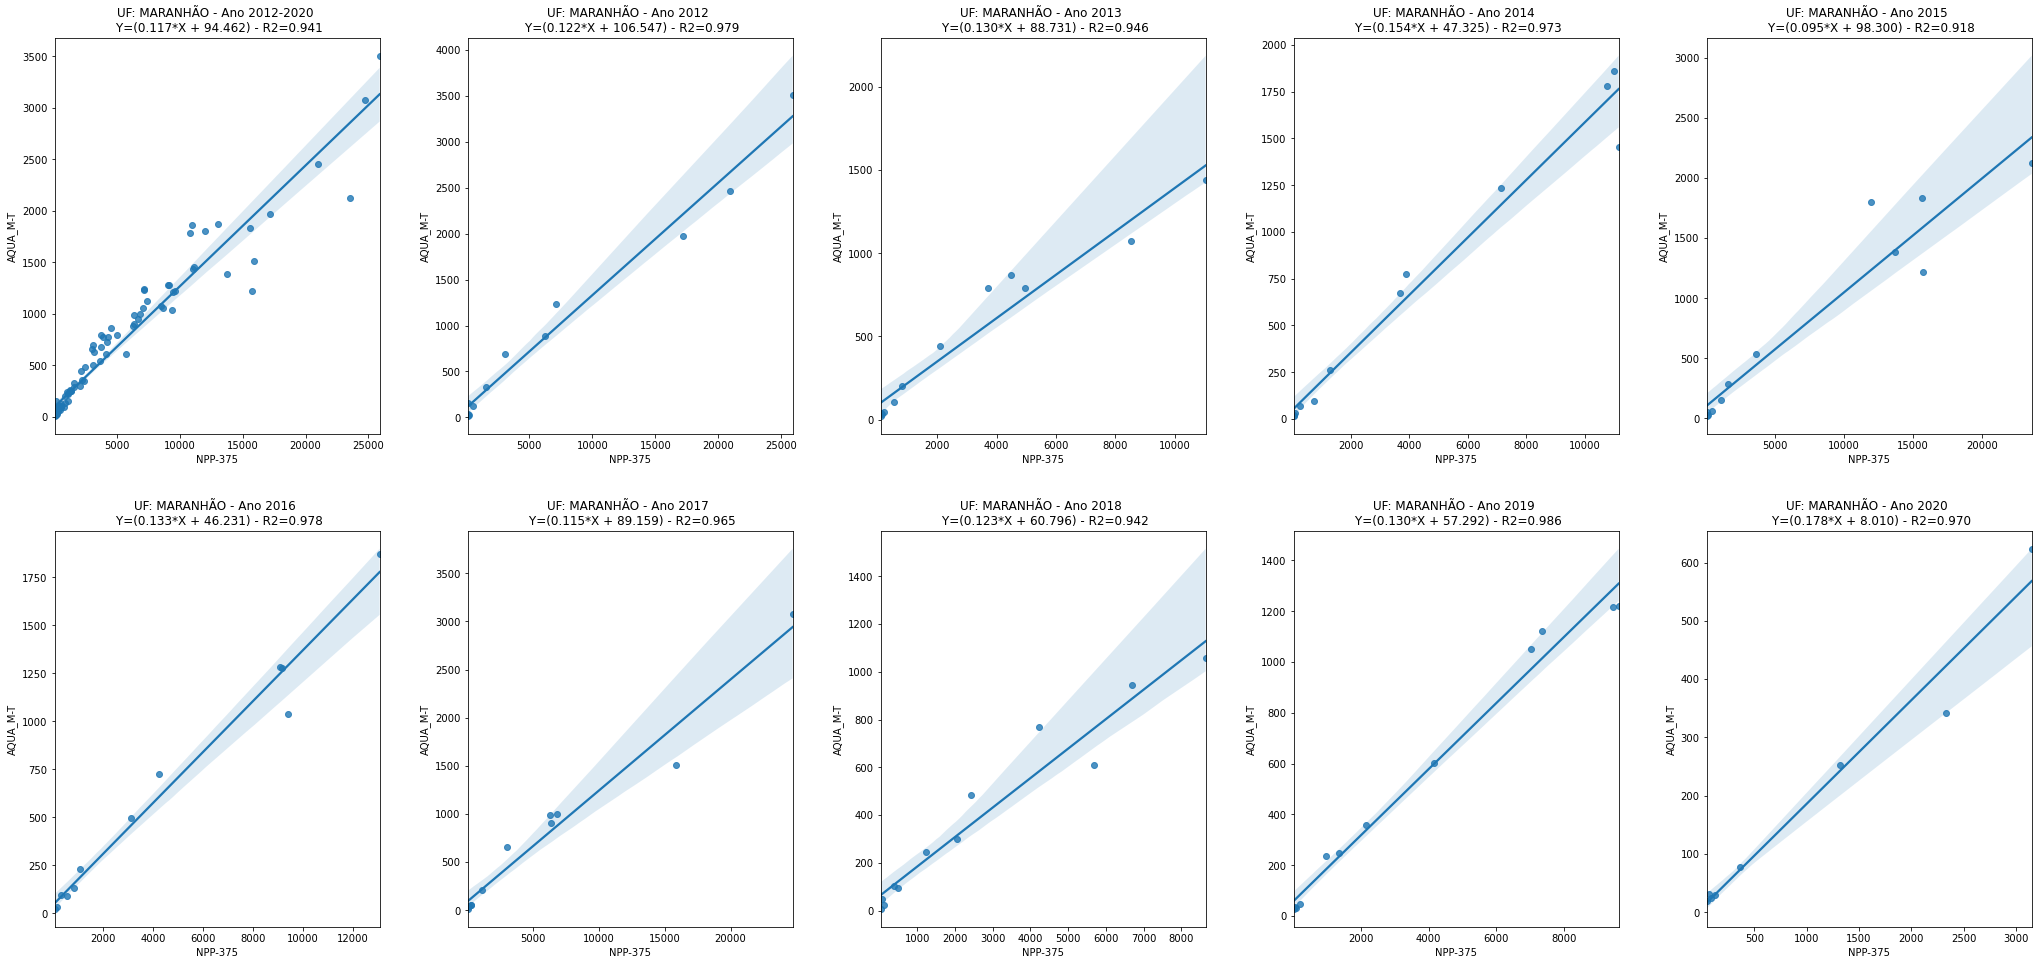



  MATO GROSSO


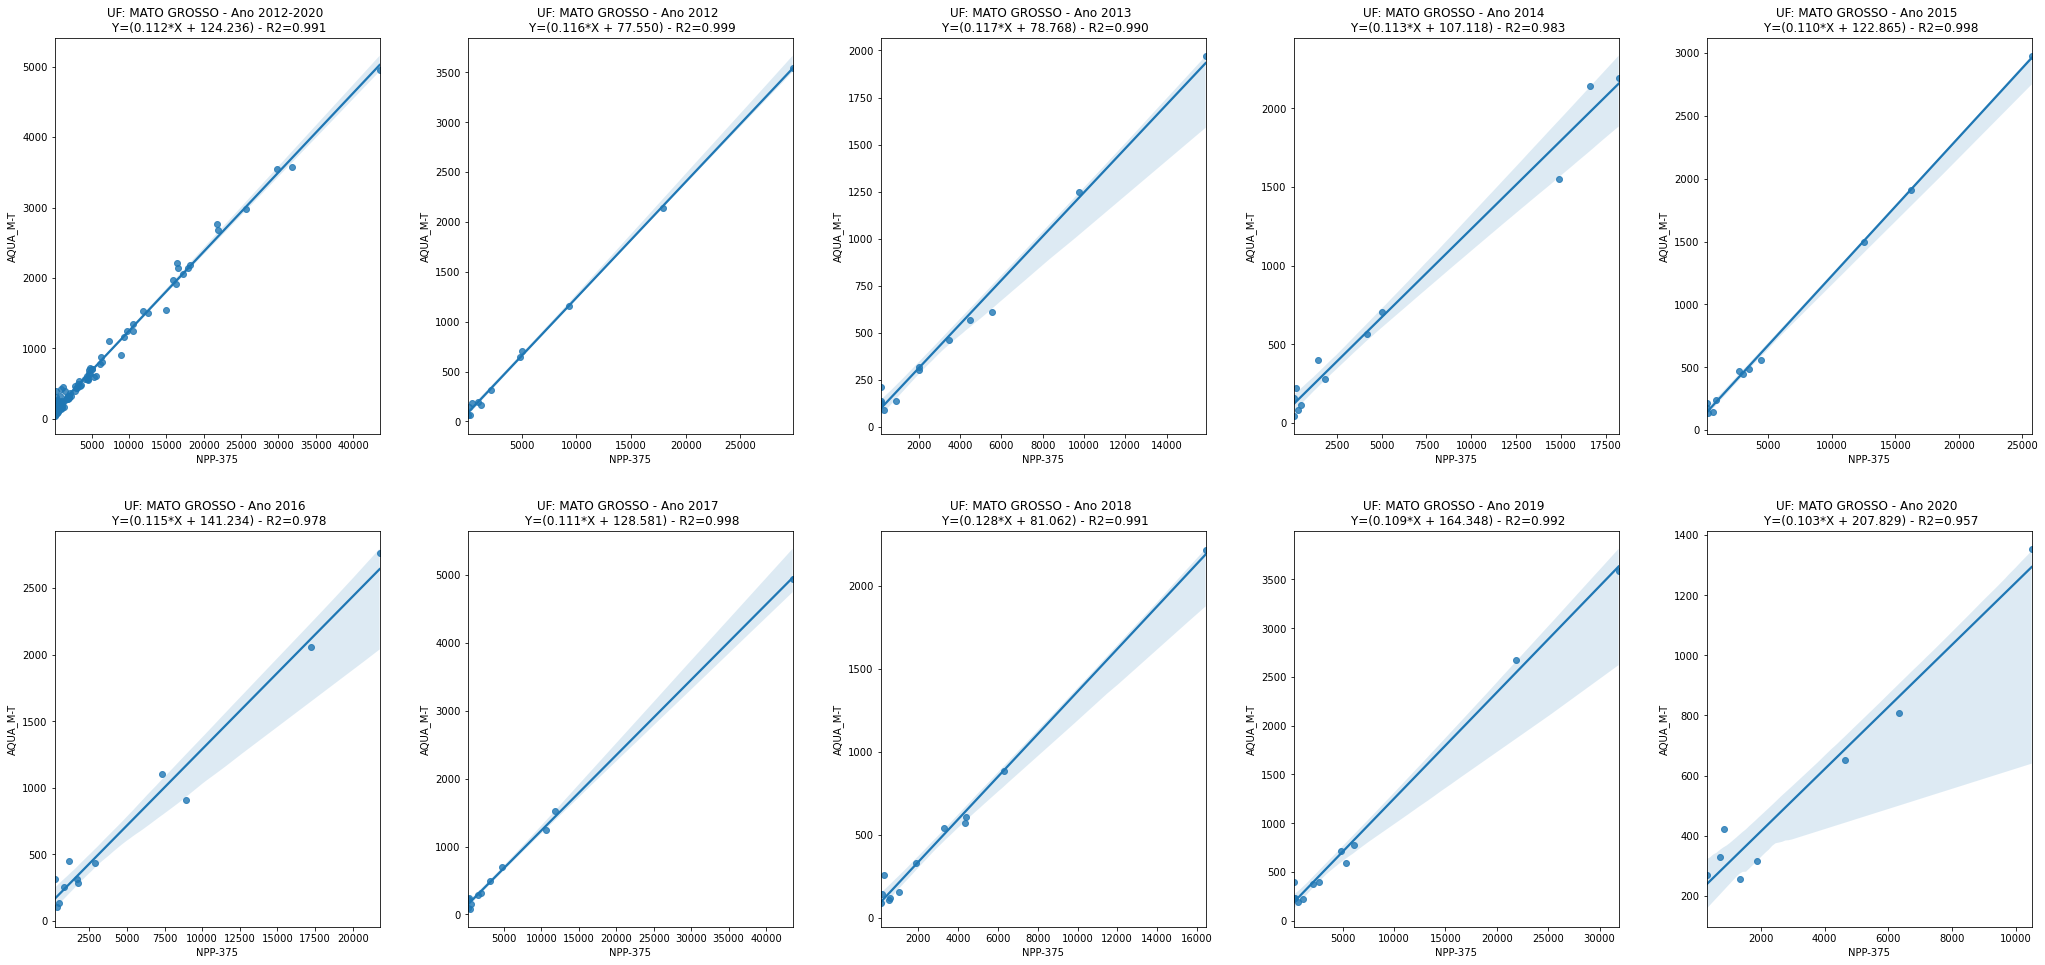



  MATO GROSSO DO SUL


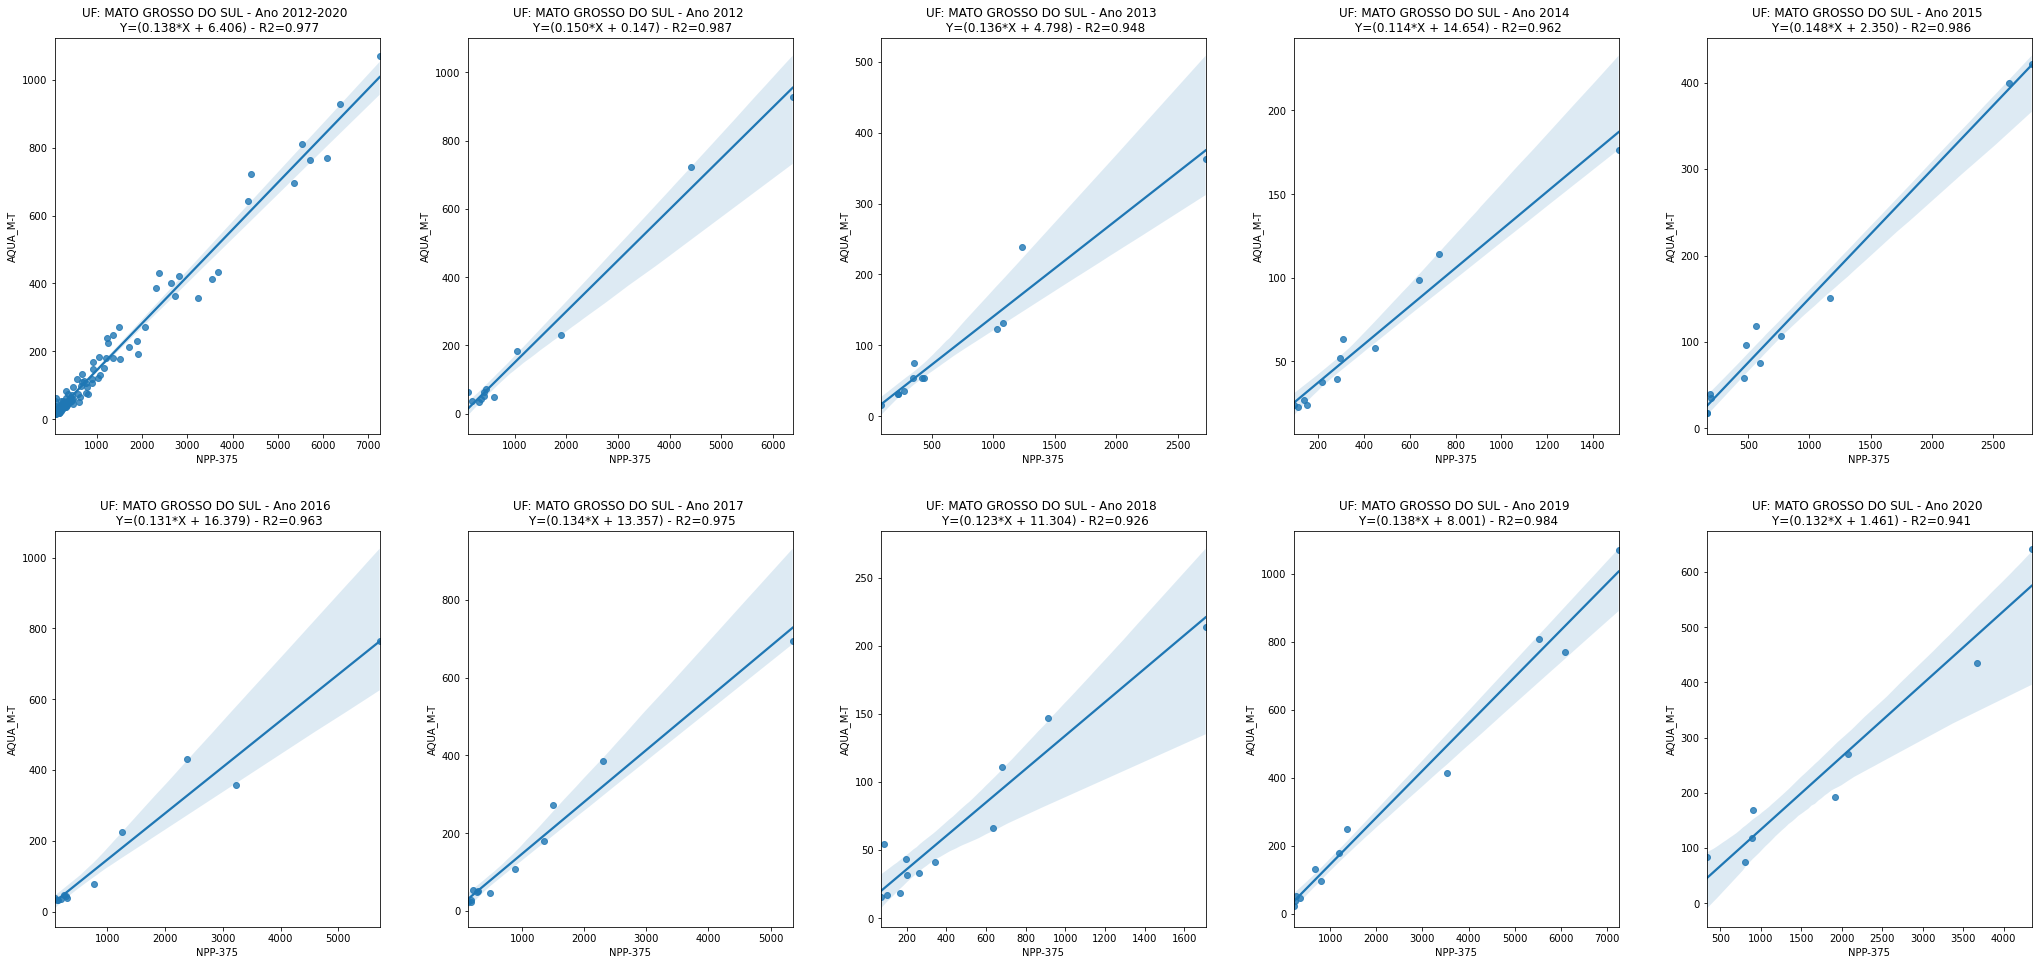



  MINAS GERAIS


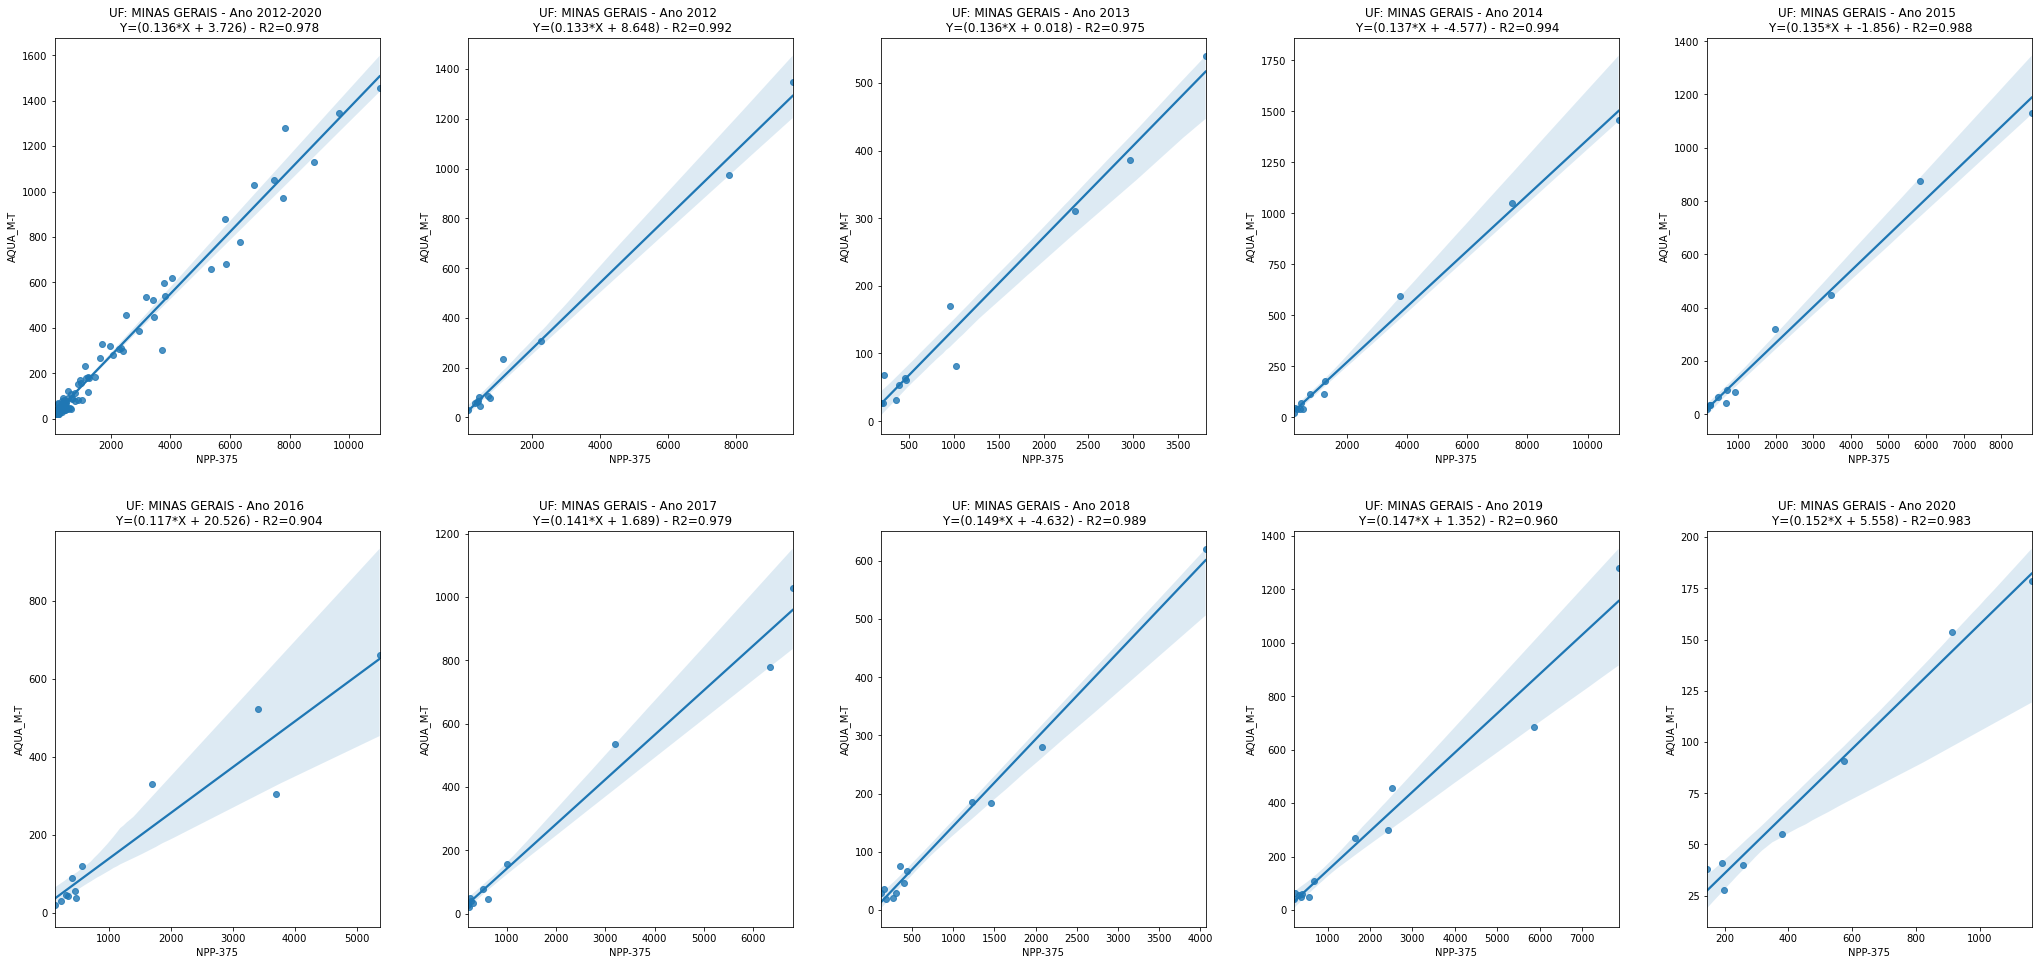



  PARANÁ


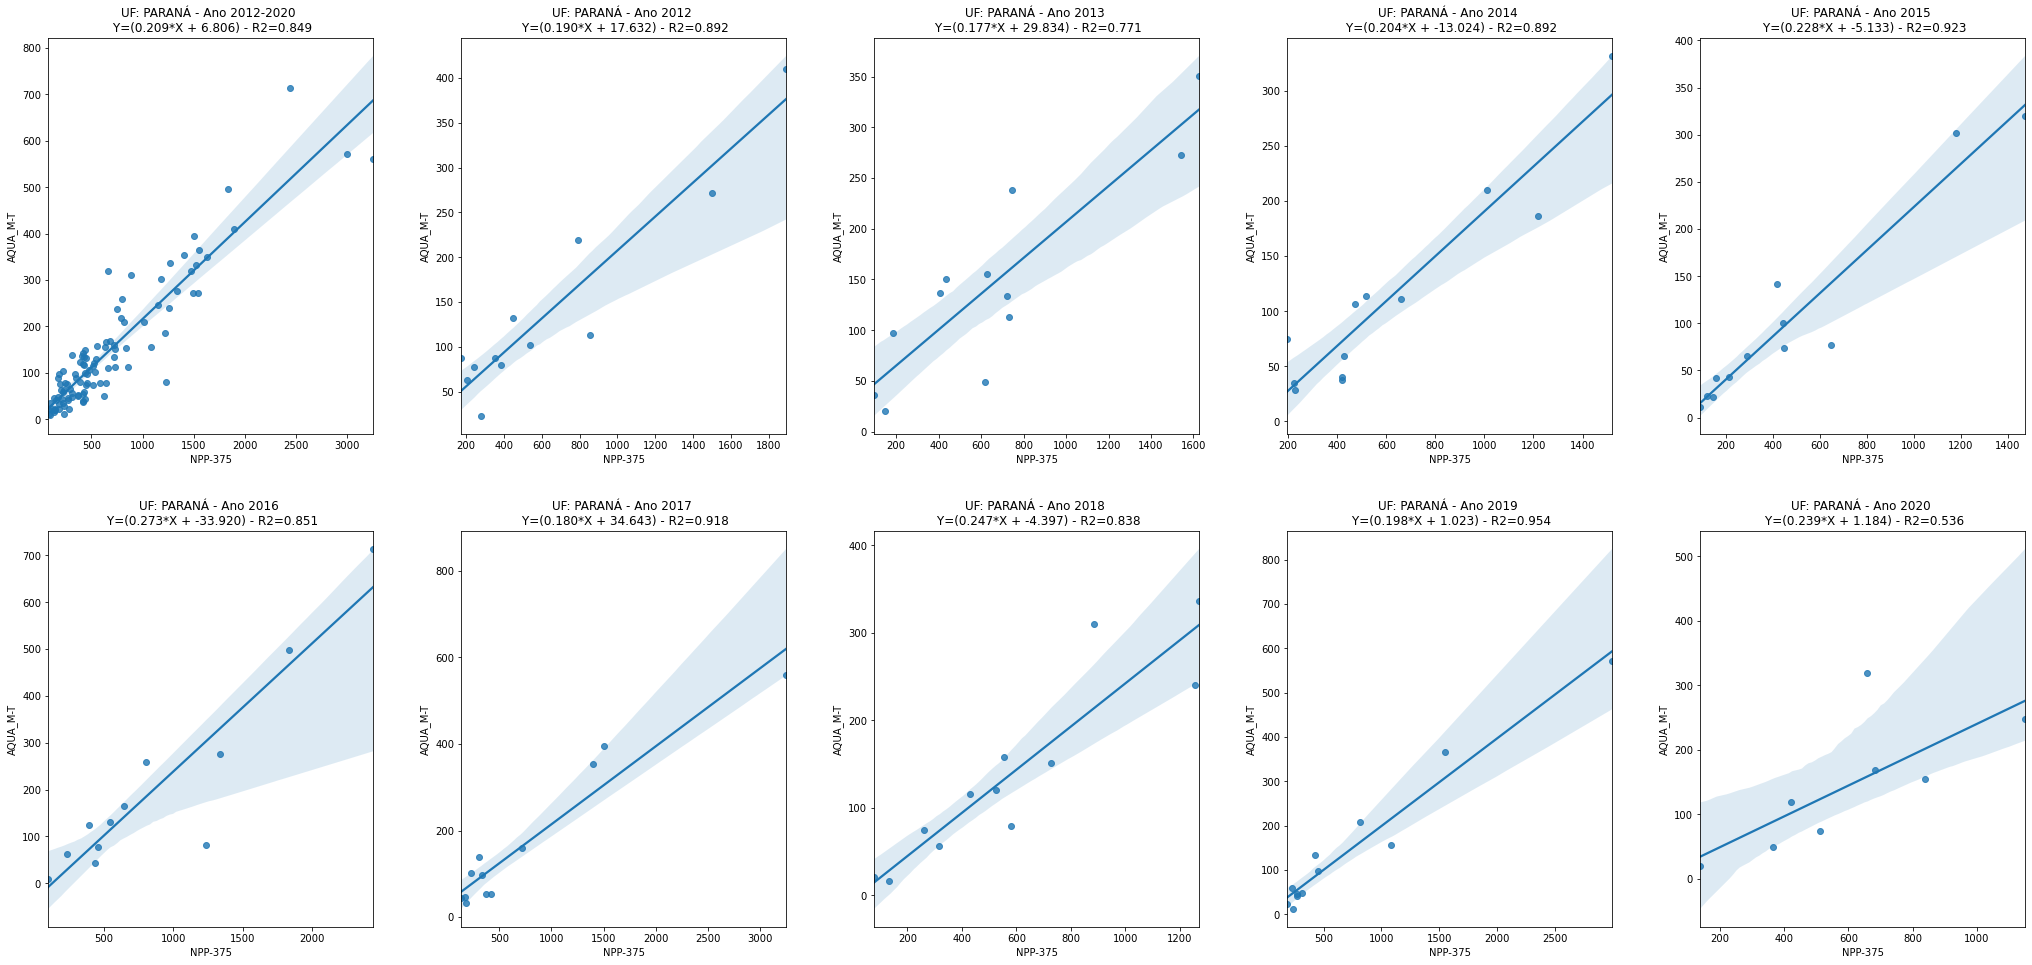



  PARAÍBA


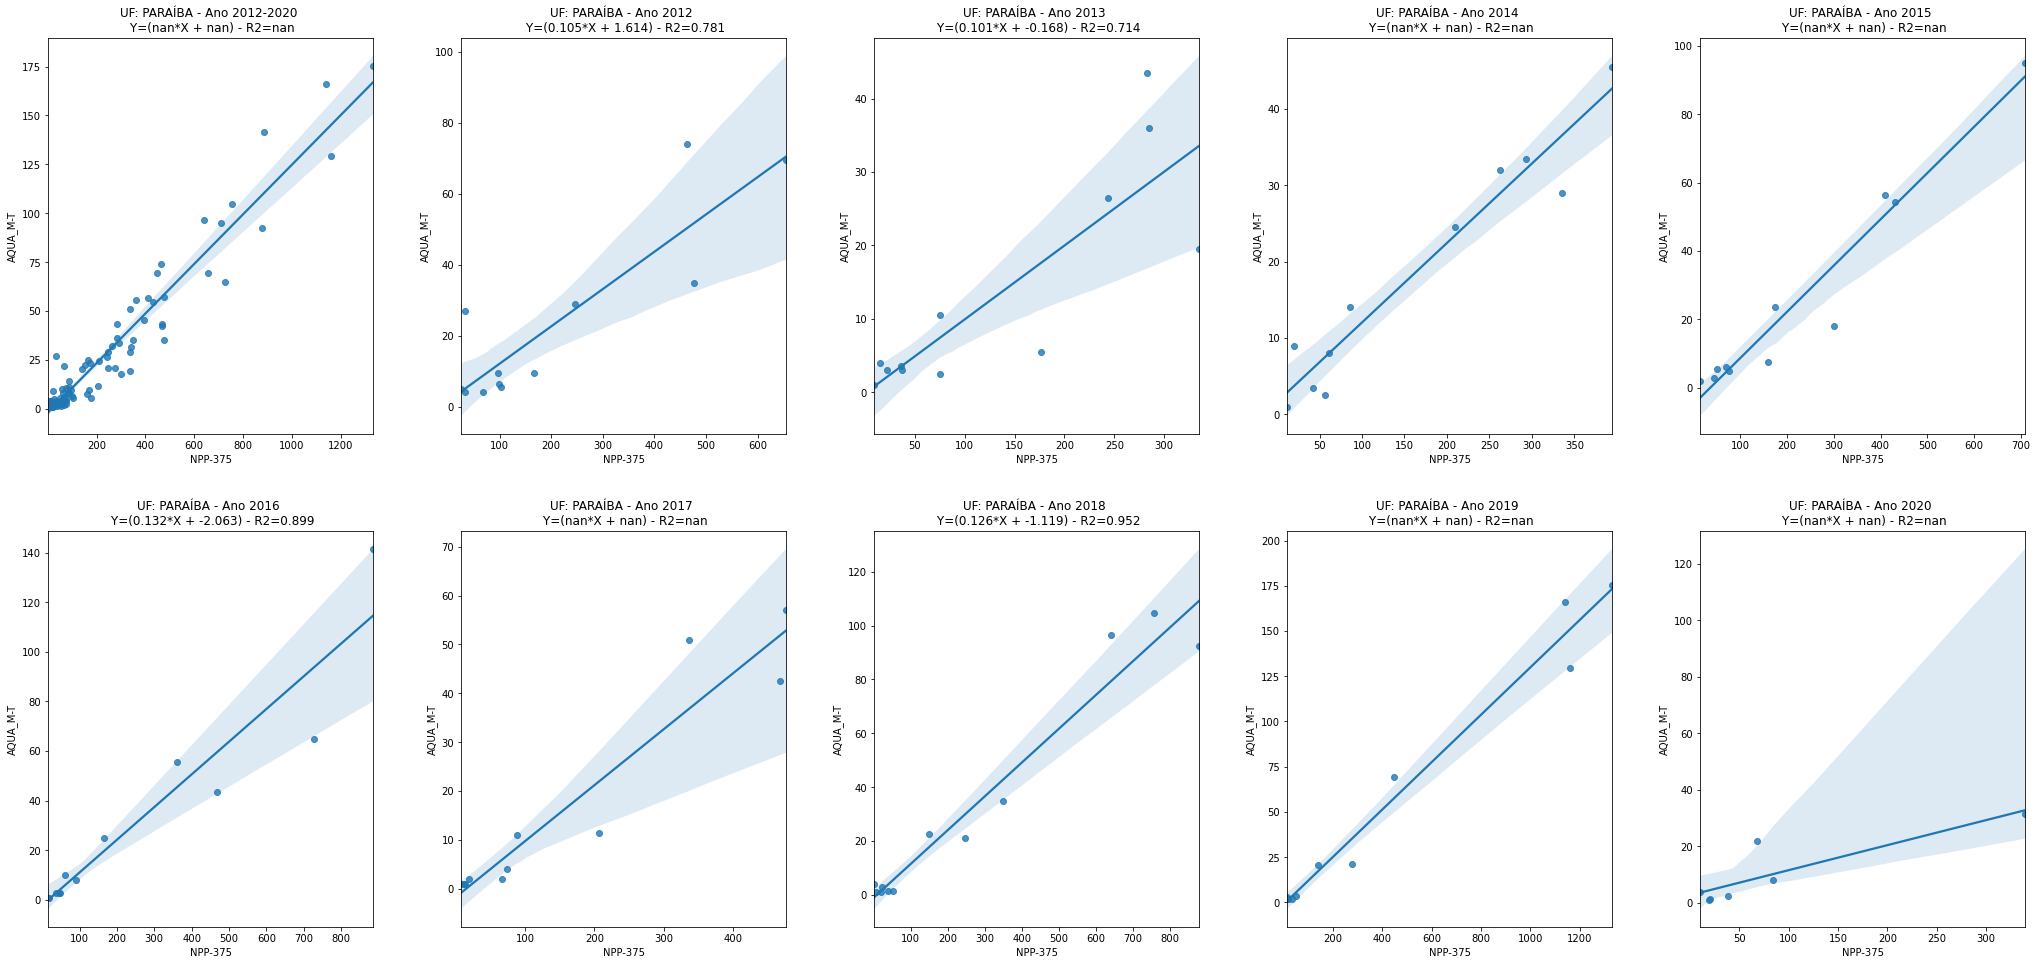



  PARÁ


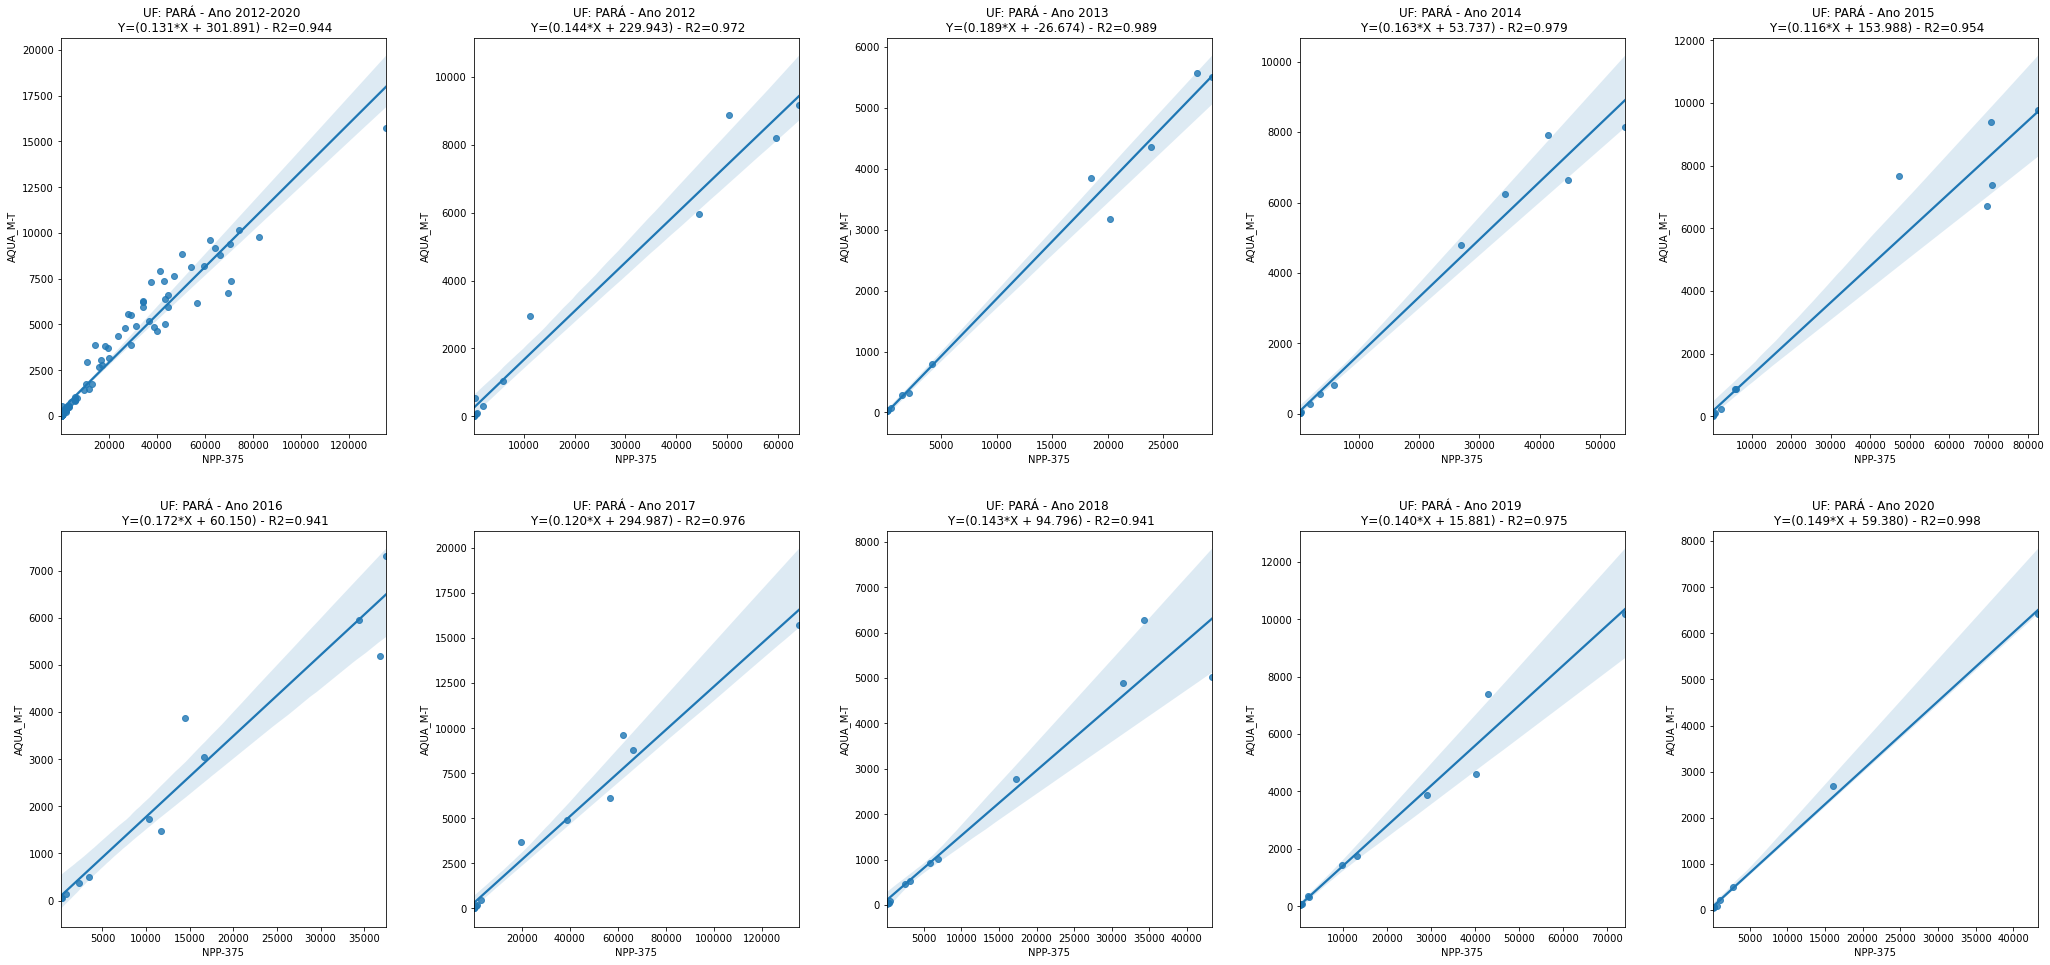



  PERNAMBUCO


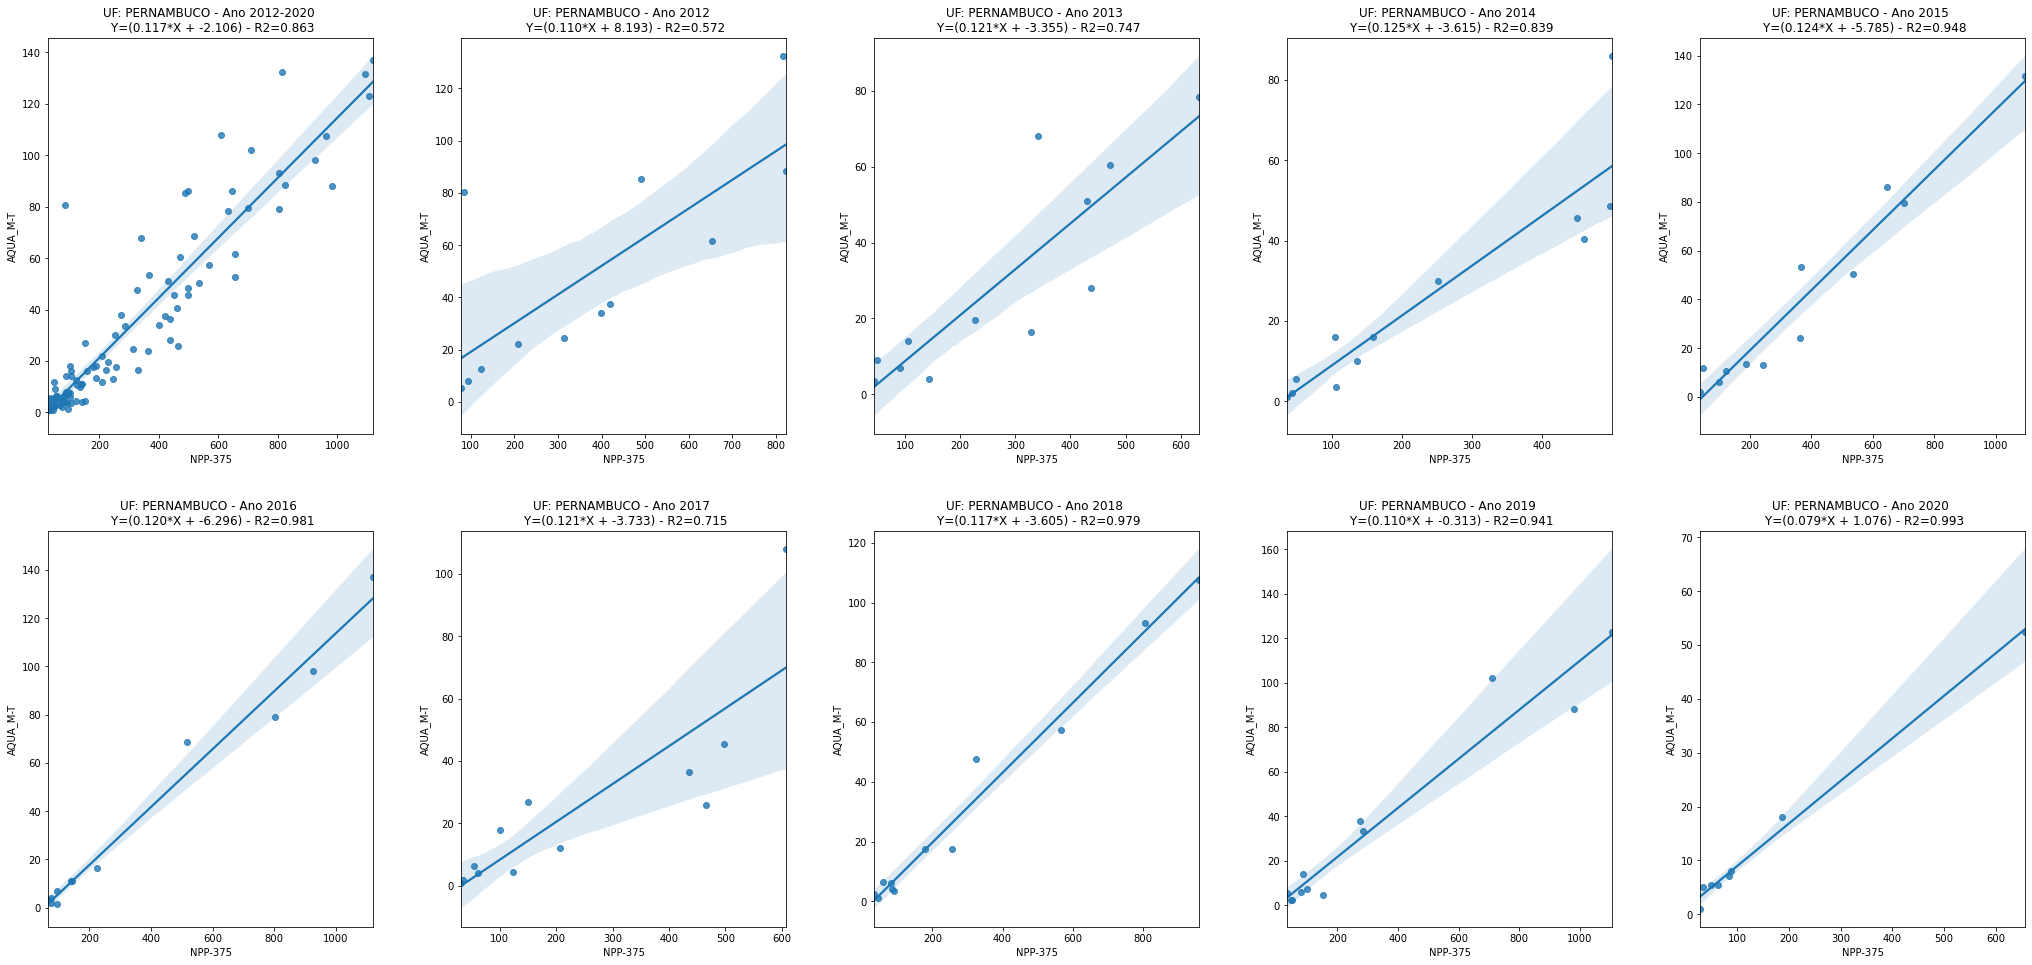



  PIAUÍ


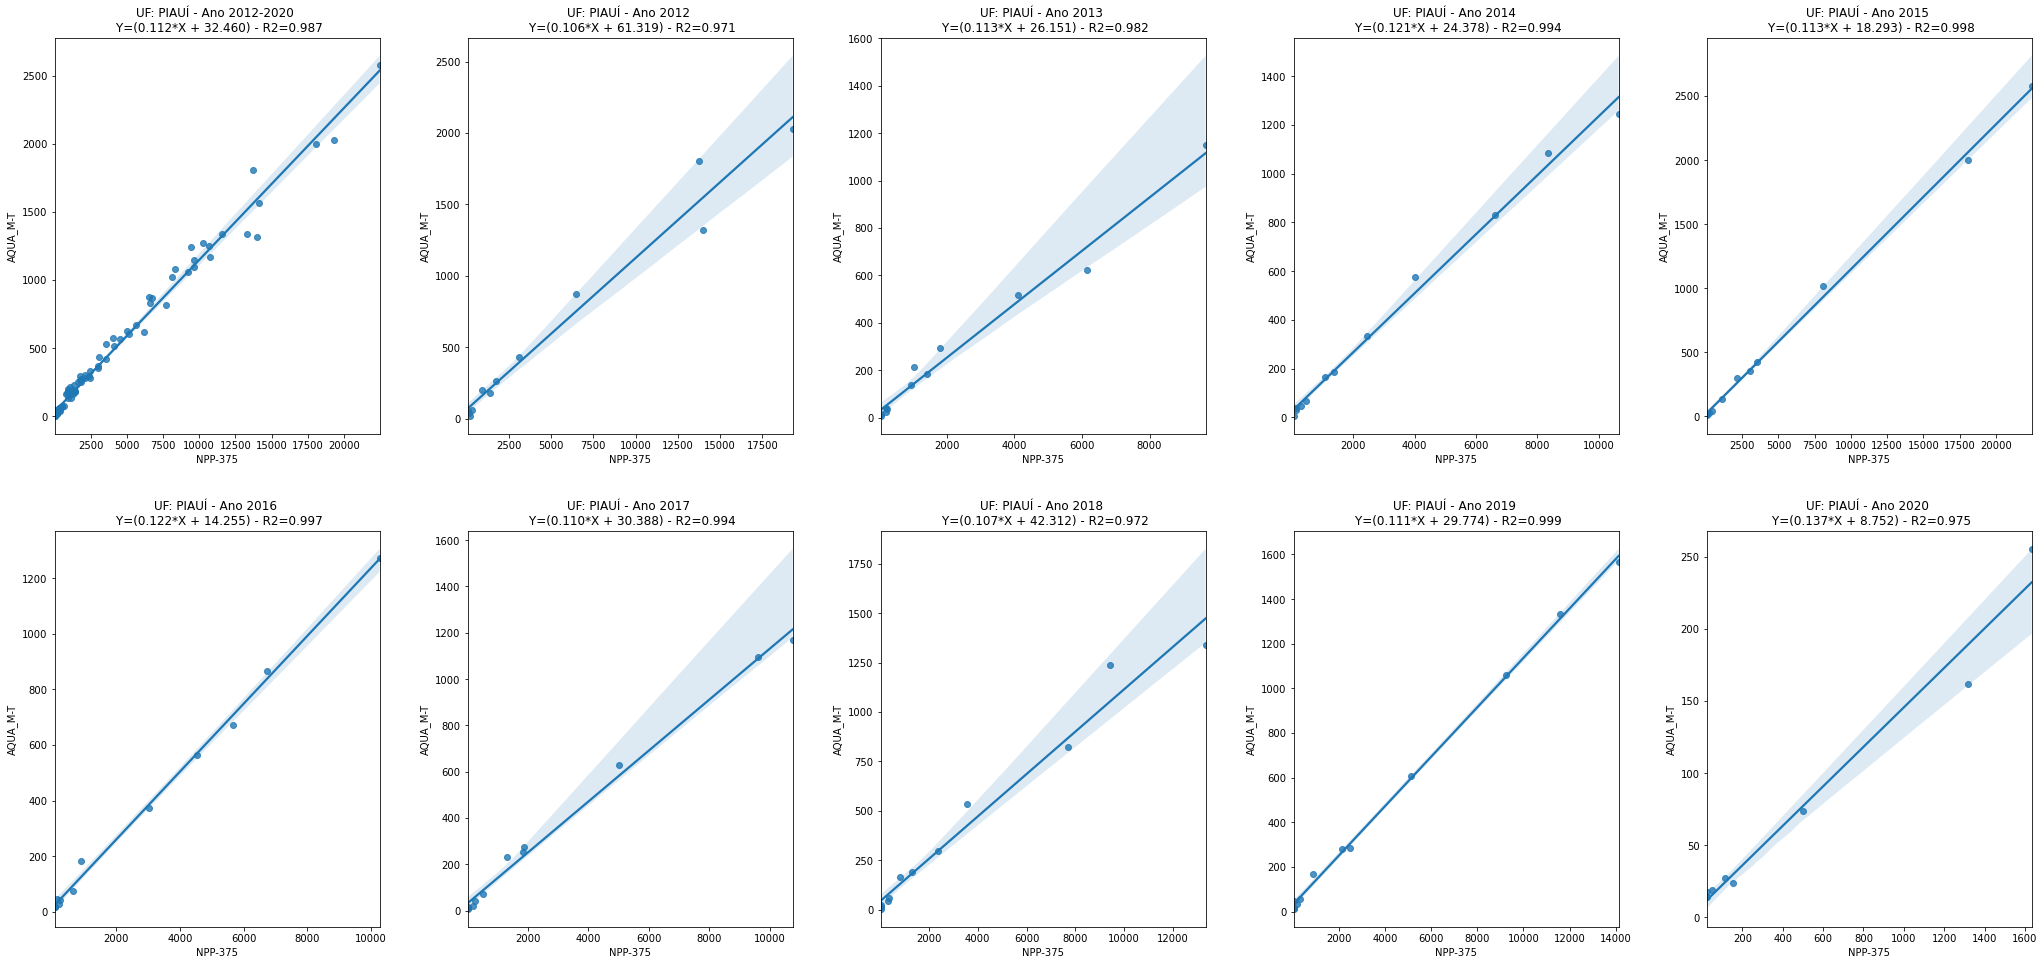



  RIO DE JANEIRO


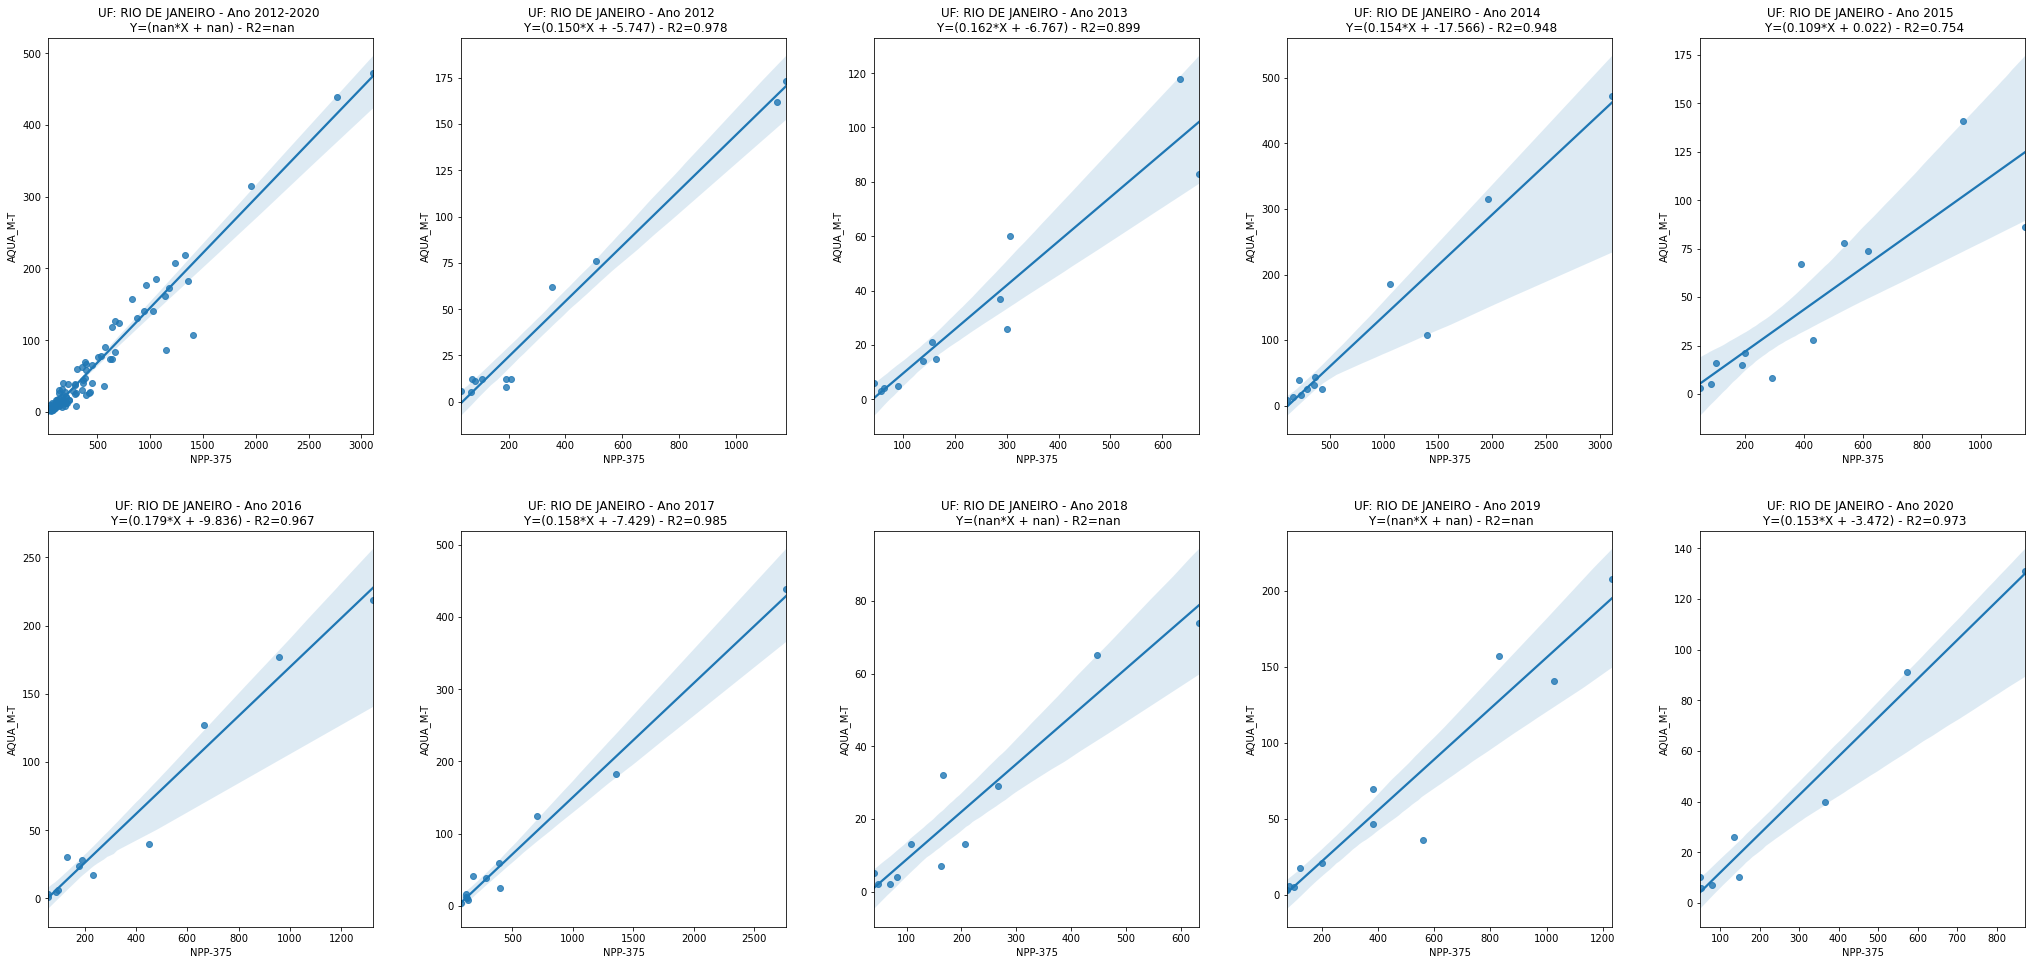



  RIO GRANDE DO NORTE


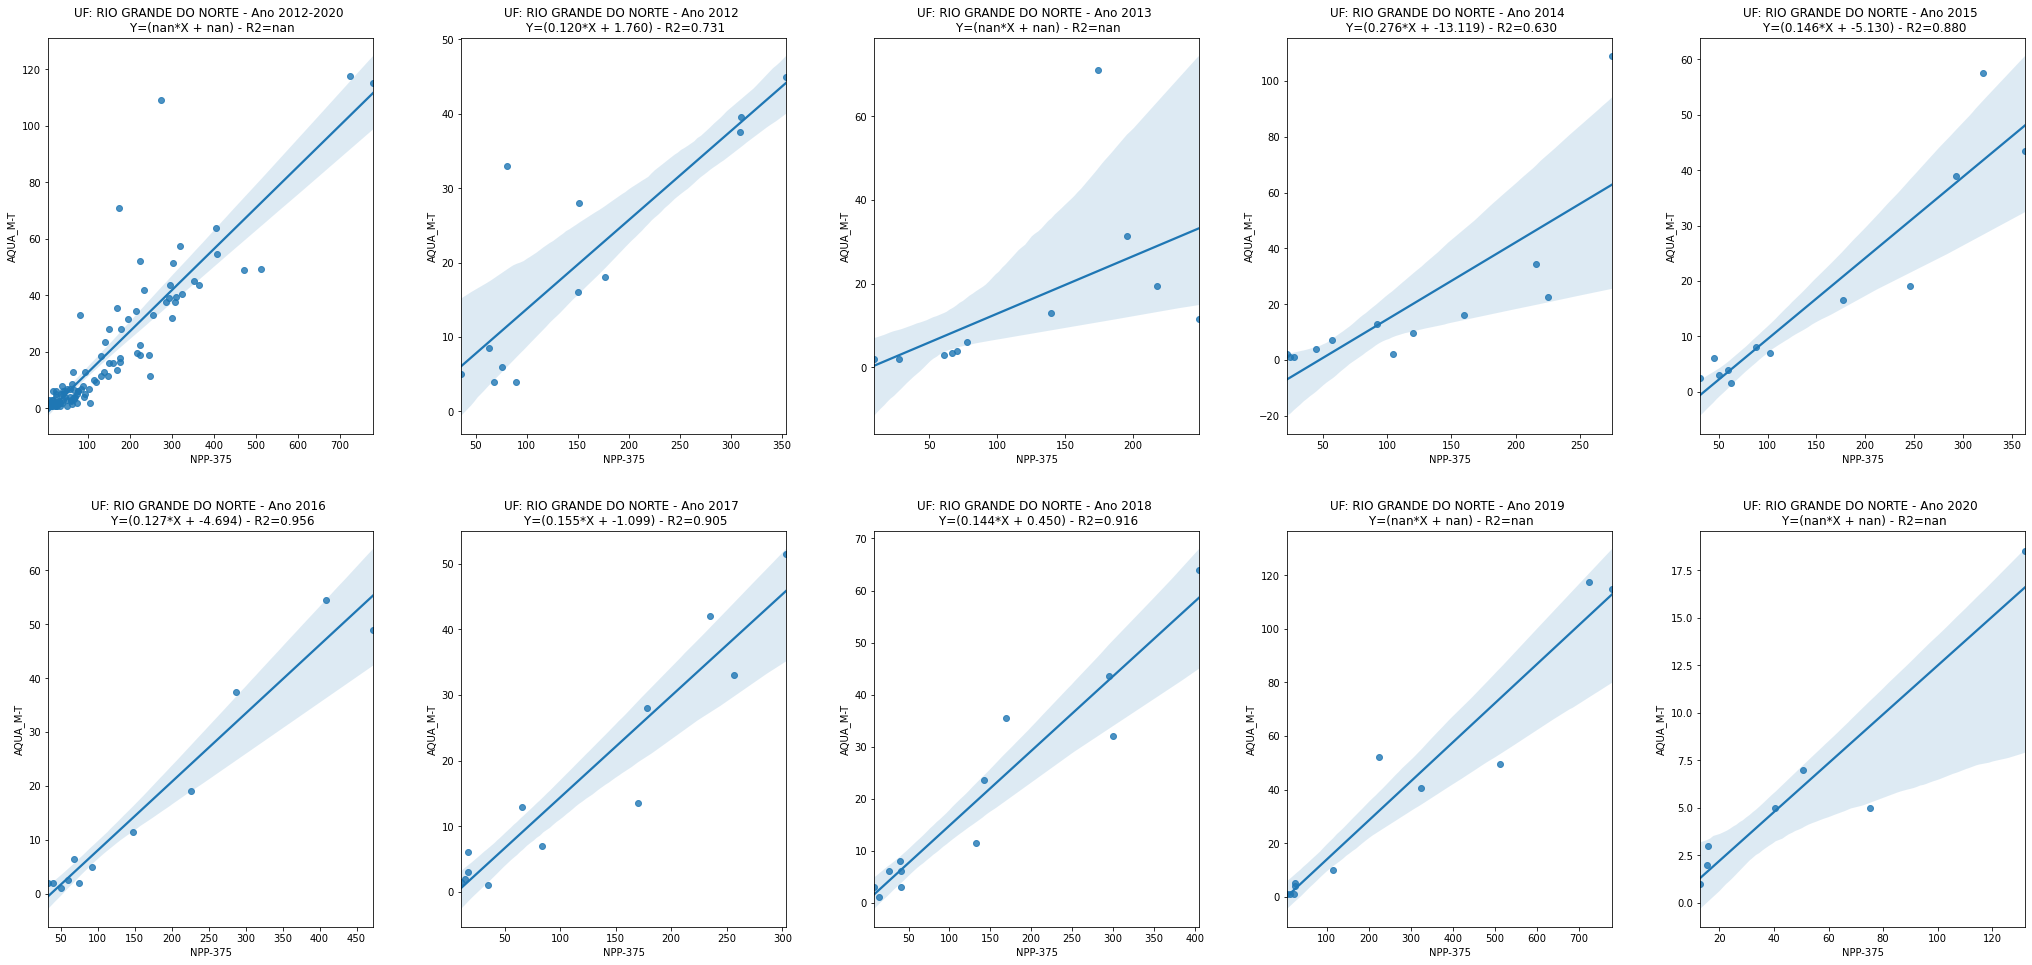



  RIO GRANDE DO SUL


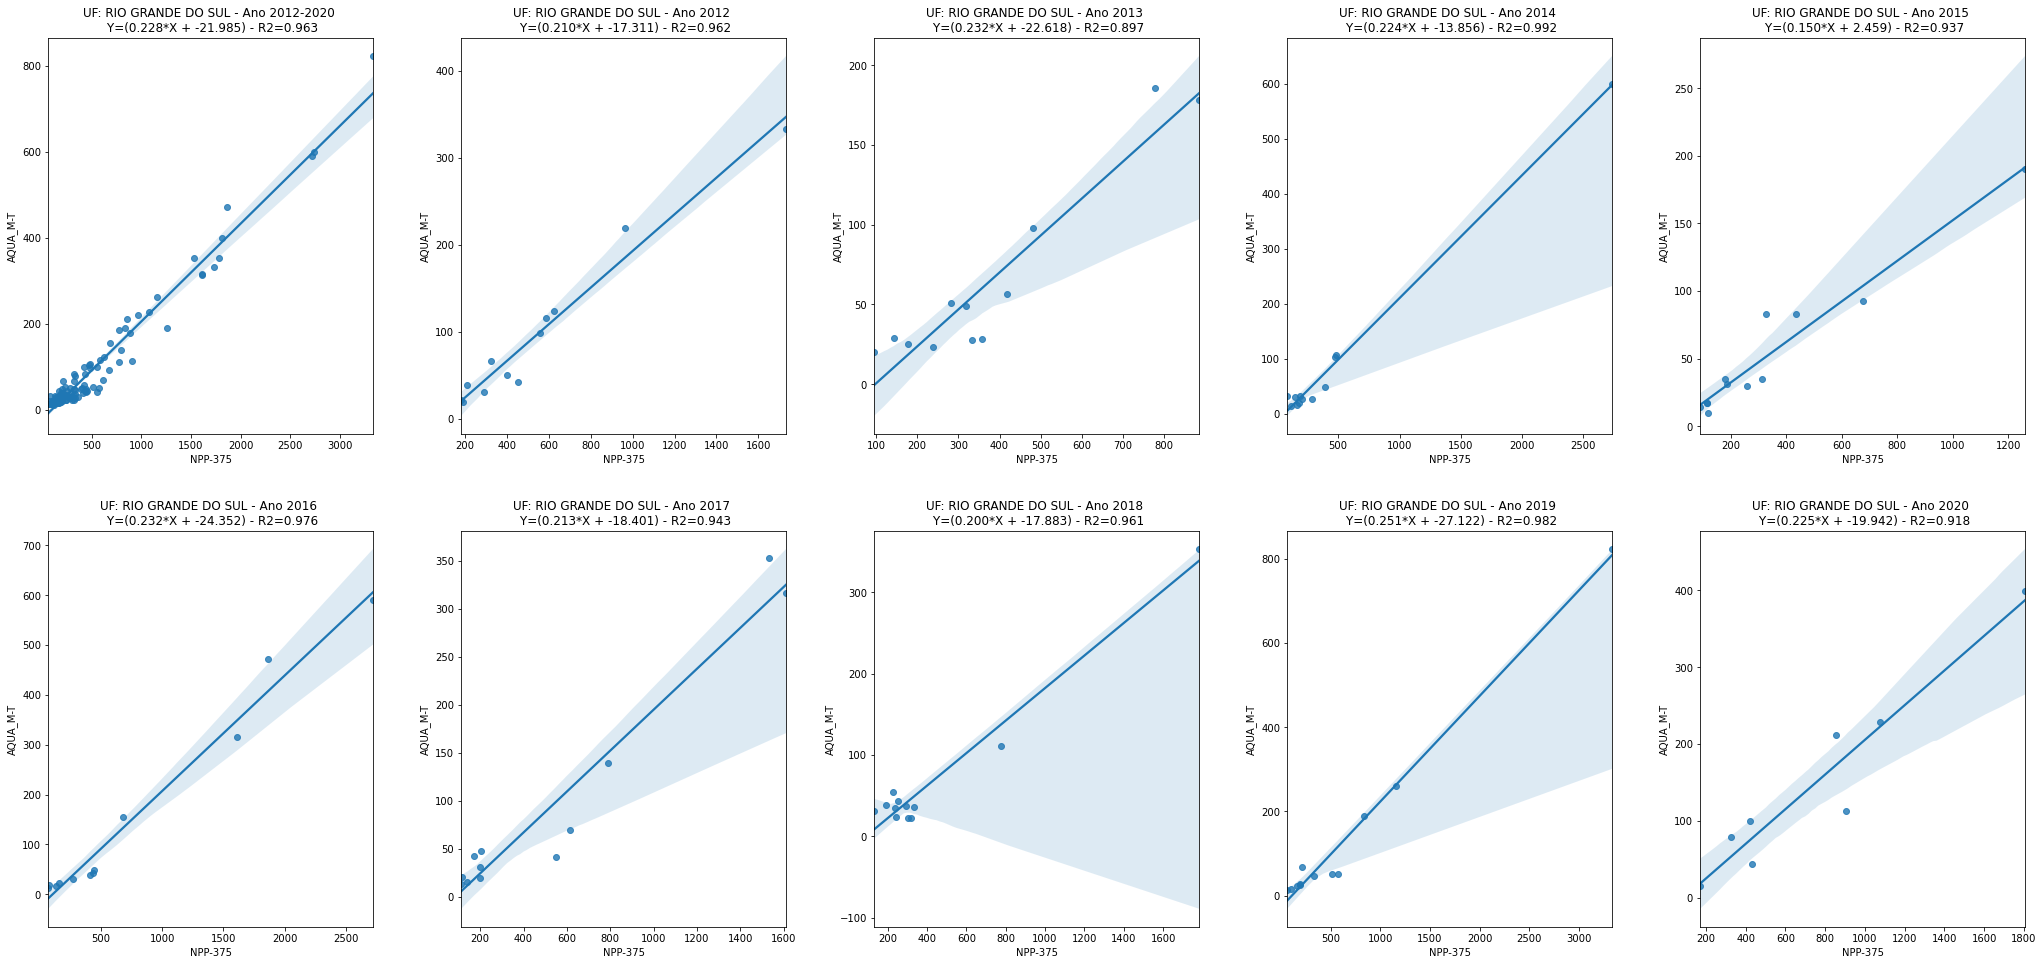



  RONDÔNIA


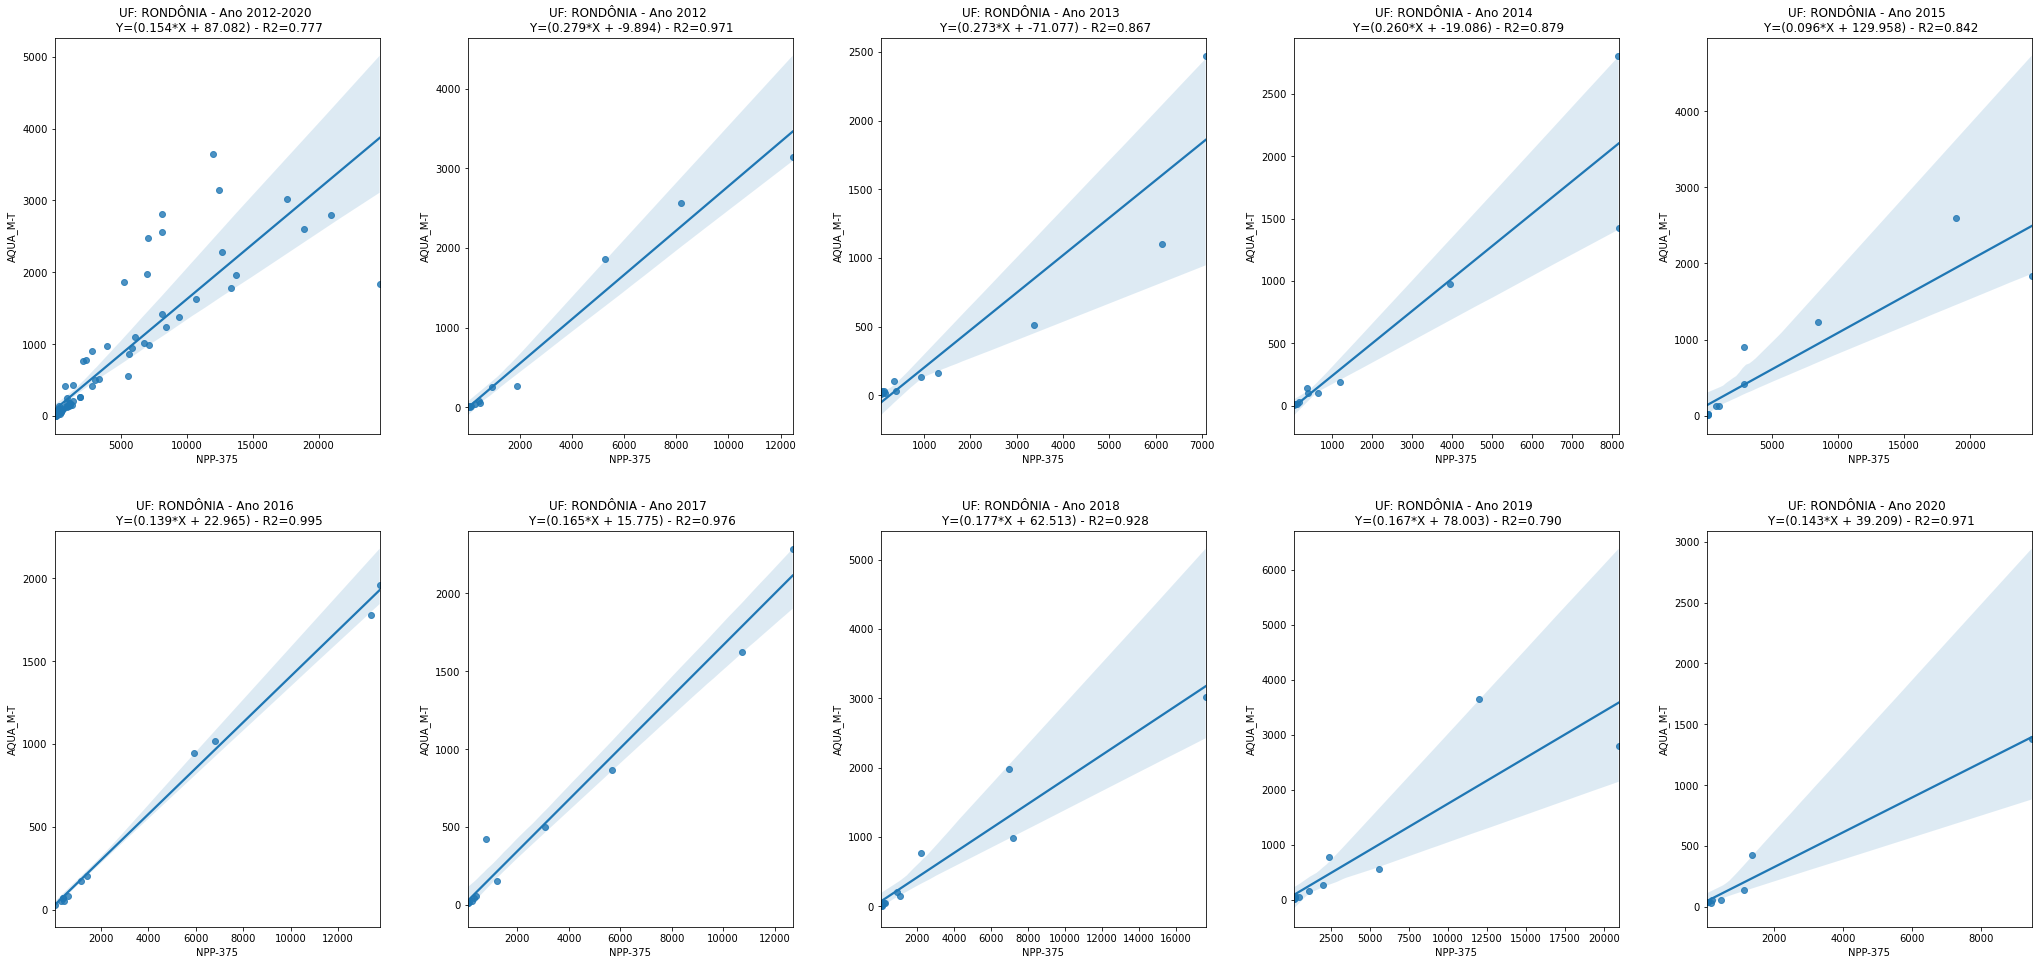



  RORAIMA


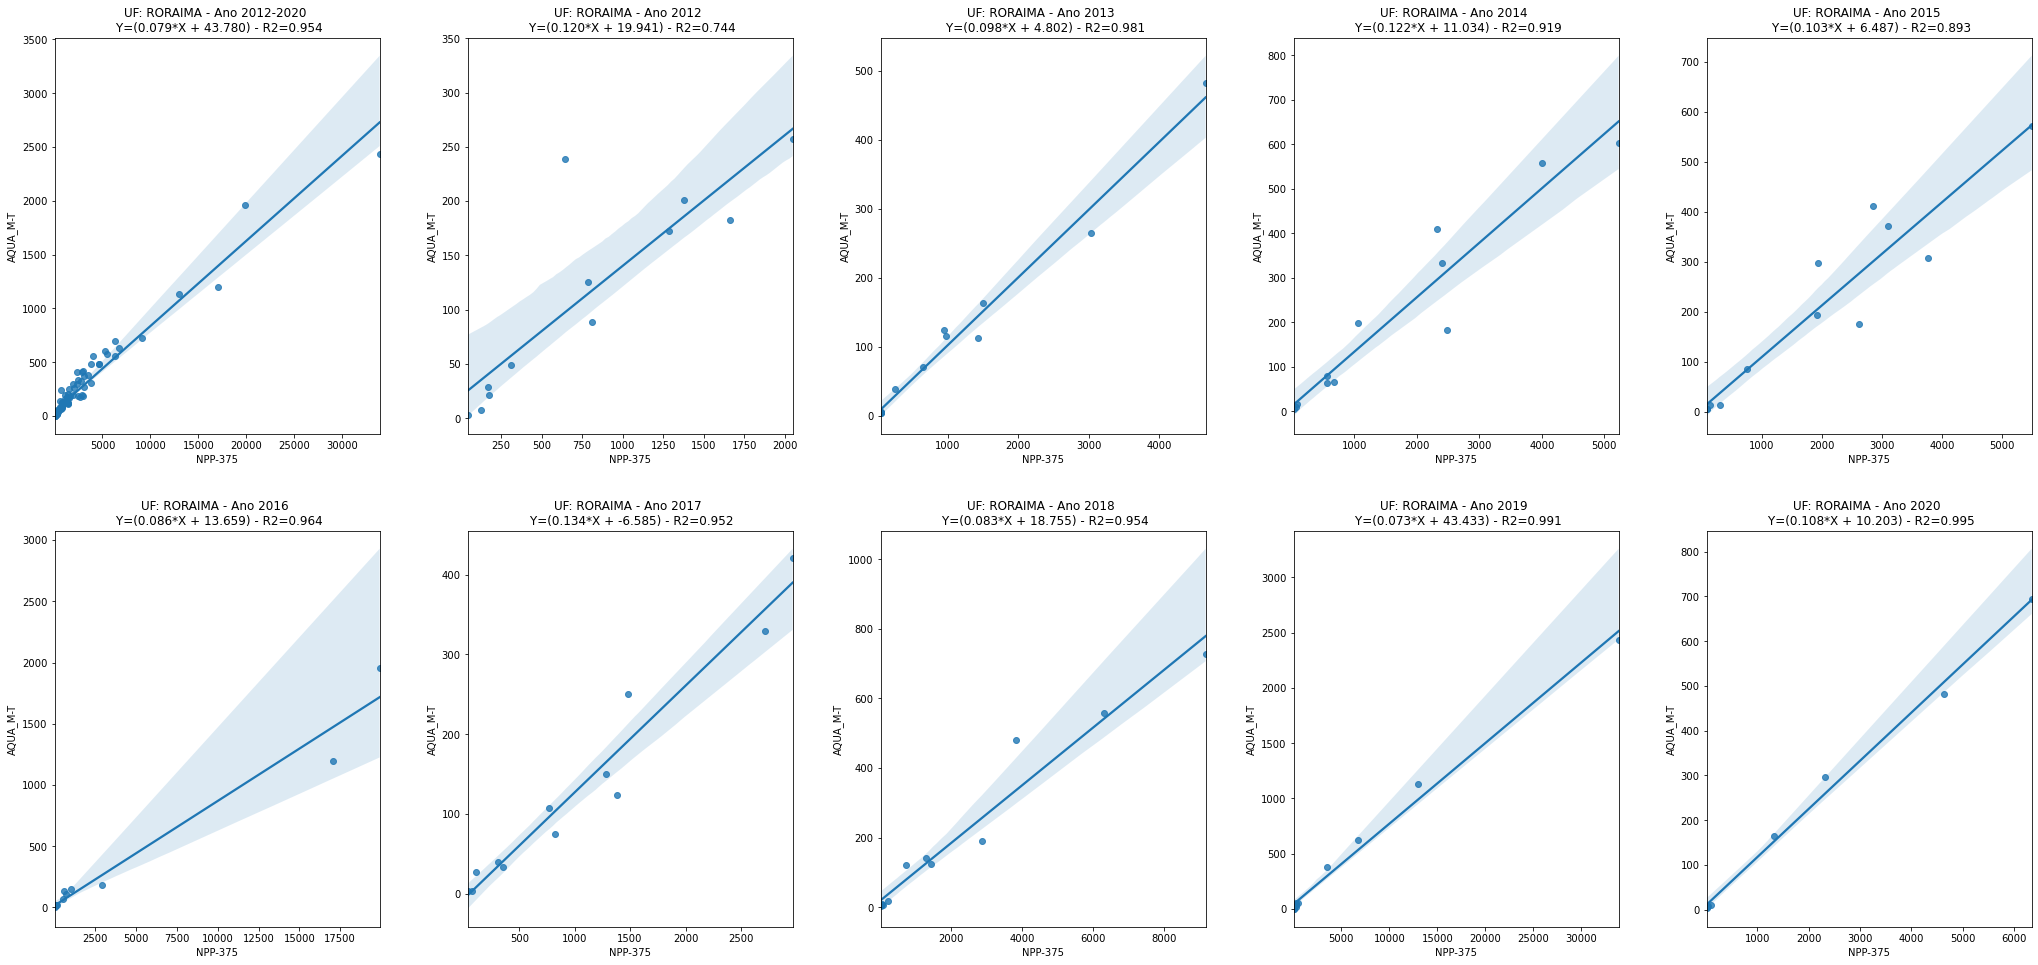



  SANTA CATARINA


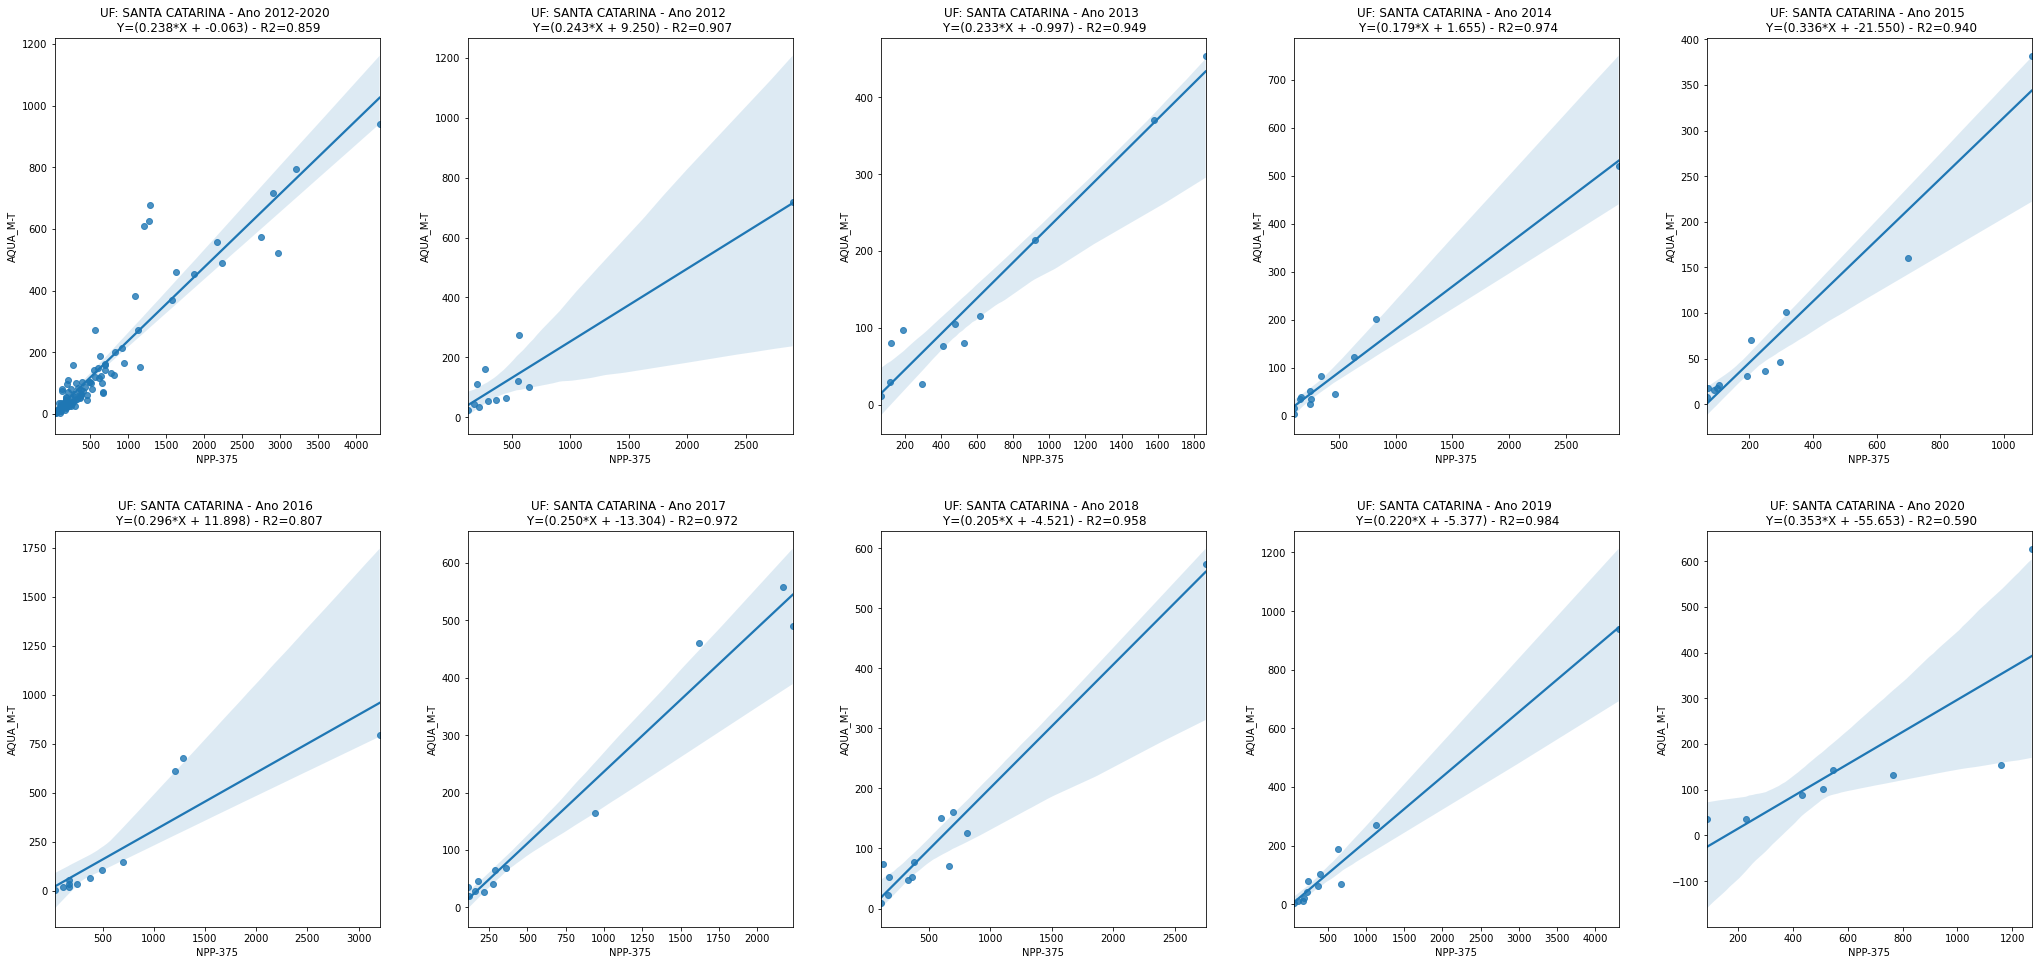



  SERGIPE


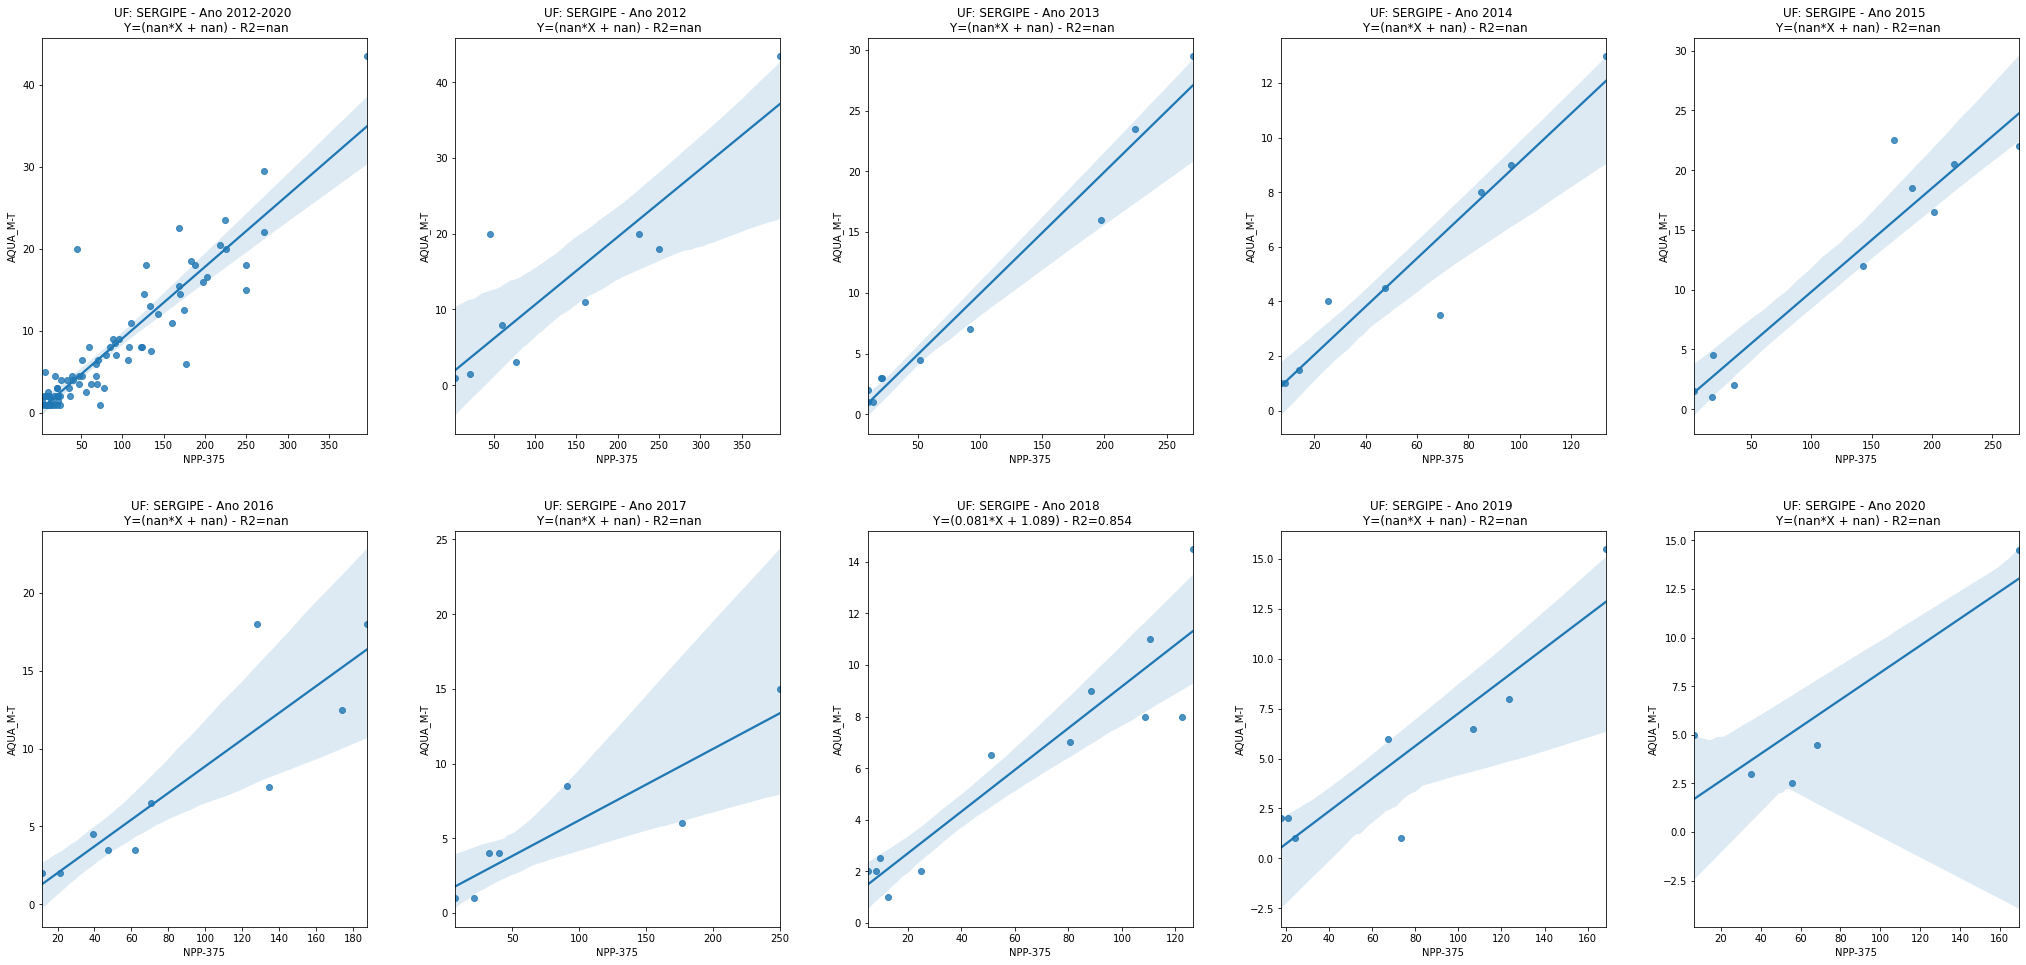



  SÃO PAULO


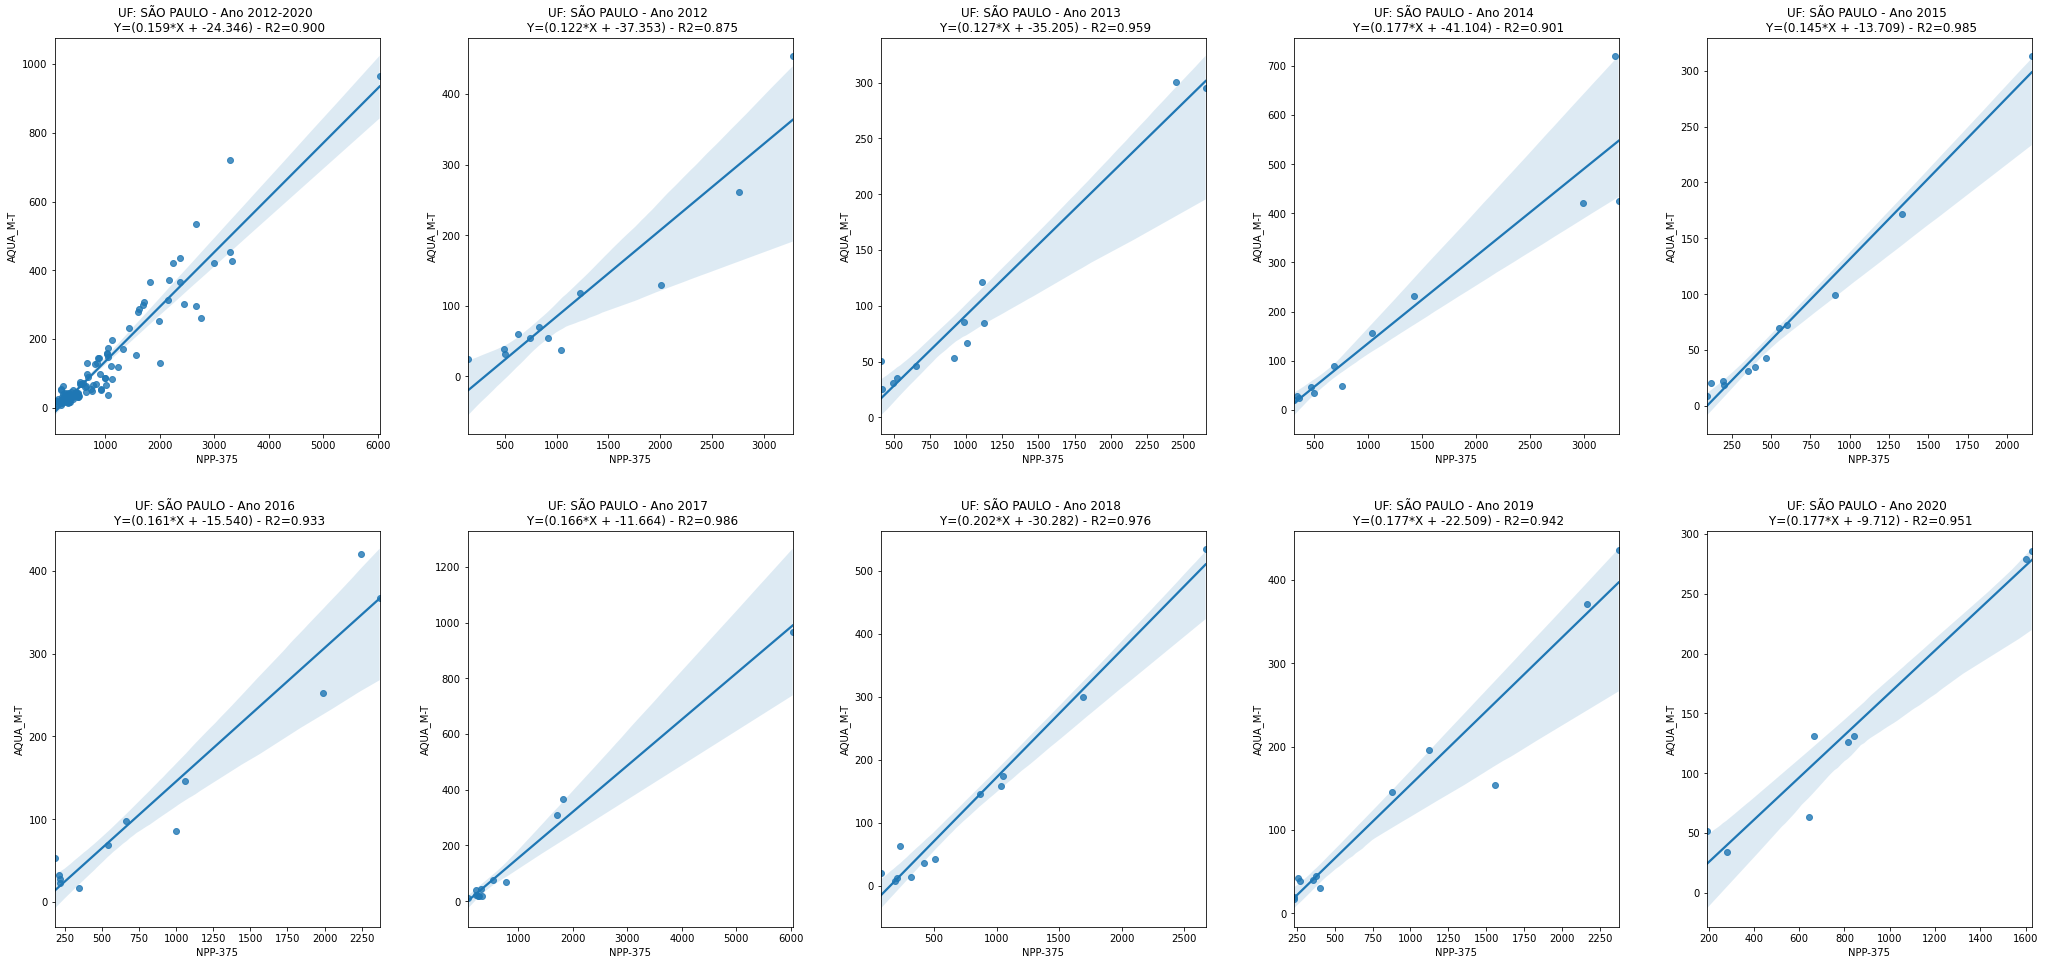



  TOCANTINS


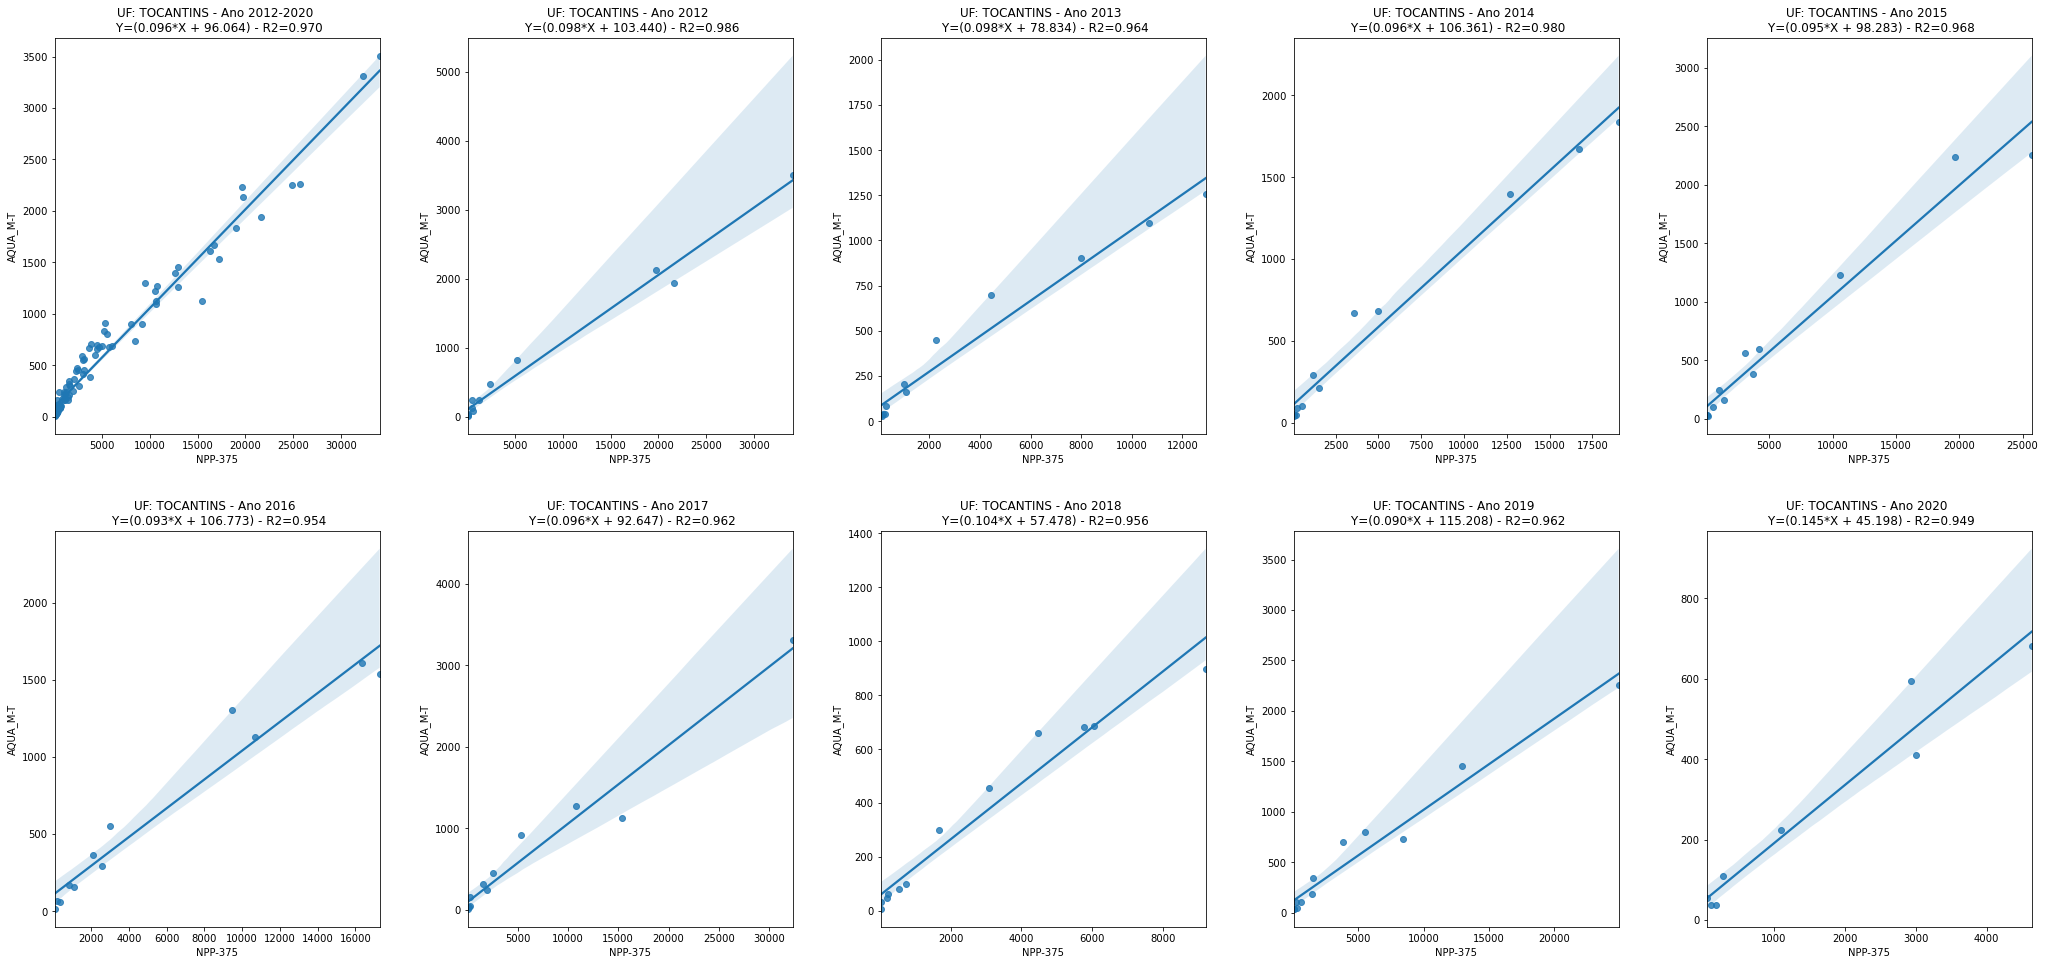

In [44]:
estados = focos.estado.unique()
estados.sort()
for estado in estados:
    print("\n\n ",estado)
    focos_estado = focos[focos.estado == estado][["data_mes", "satelite", "qtd"]]
    acum = focos_estado.pivot_table(index='data_mes', columns=[ 'satelite'], aggfunc="mean", values='qtd', margins=False )
    acum = pd.DataFrame(acum.to_records())
    acum['ano']=acum.data_mes.dt.year
    
    slope, intercept, r_value, p_value, std_err = linregress( acum['NPP-375'], acum['AQUA_M-T'] )
    titulo = "UF: {} - Ano {} \n Y=({:.3f}*X + {:.3f}) - R2={:.3f}".format(estado, '2012-2020', slope, intercept, r_value**2)
    
    fig = plt.figure(figsize=(30,15))# 
    
    ax1 = fig.add_subplot(2,5,1, title=titulo)
    
    fig.tight_layout(pad=8.0)
#     plt.subplots_adjust(top=1, bottom=0.15, left=0.15, right=0.95, hspace=0.85, wspace=0.15)
#     plt.subplots_adjust(hspace=1.5)
    # Create the graph of linear model
    ax1 = sns.regplot(x="NPP-375", y="AQUA_M-T" ,data=acum, ax=ax1, label='s')
 
    
    idx = 2
    for ano in range(2012,2021):

        if focos_estado[focos_estado.data_mes.dt.year == int(ano)].size > 0:

            # filtra dados para o ano 
            focos_estado_ano = focos_estado[focos_estado.data_mes.dt.year == int(ano)]

            acum = focos_estado_ano.pivot_table(index='data_mes', columns=[ 'satelite'], aggfunc="mean", values='qtd', margins=False )
            acum = pd.DataFrame(acum.to_records())

            slope, intercept, r_value, p_value, std_err = linregress( acum['NPP-375'], acum['AQUA_M-T'] )
            titulo = "UF: {} - Ano {} \n Y=({:.3f}*X + {:.3f}) - R2={:.3f}".format(estado, ano, slope, intercept, r_value**2)
            ax2 = plt.subplot(2,5, idx , title='{}'.format(titulo))

            ax2 = sns.regplot(x="NPP-375", y="AQUA_M-T" ,data=acum, ax=ax2, label='s')
            idx = idx + 1
        else:
            ax2 = plt.subplot(2,5, idx , title='{}'.format("AUSENCIA DE DADOS"))
            idx = idx + 1
    plt.show()